# Imports 


In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Functions

In [166]:
def plotTimeSeries(x, y, title, AxisX, AxisY, save=None, *config):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y, color= 'red')
    plt.title(title)
    plt.xlabel(AxisX)
    plt.ylabel(AxisY)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    if save:
        plt.savefig(save)
        return None
    plt.show()
    
def plotScatter(x, y, title, AxisX, AxisY, save=None, *config):
    plt.figure(figsize=(16, 9))
    plt.scatter(x, y, *config)
    plt.title(title)
    plt.xlabel(AxisX)
    plt.ylabel(AxisY)
    if save:
        plt.savefig(save)
        return None
    plt.show()

# Opening dataset

In [70]:
COVID_19_DATA = "./data/covid-19/*.csv"
data = glob.glob(COVID_19_DATA)[2:]
dfs = [pd.read_csv(i) for i in data]

# concat in one df
df = pd.concat(dfs, ignore_index=True)

print("columns")
display(f"{df.columns.to_list()}")
display(f"{len(df)} lines")

columns


"['Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Suspected', 'Recovered', 'Death']"

'8500 lines'

# Countries in dataset

In [153]:
countries = df['Country/Region'].unique()
display(countries)

def filterByCountry(df, country):
    filtered = df[df['Country/Region'] == f'{country}']

    # Removendo o horário
    filtered['Last Update'] = filtered['Last Update'].apply(lambda x: x.split()[0])

    # Convertendo coluna de data para timestamp
    filtered['Last Update'] = pd.to_datetime(filtered['Last Update'], format='%m/%d/%Y', errors='coerce')
    filtered['Last Update'] = pd.to_datetime(filtered['Last Update'], errors='coerce')
    filtered = filtered.sort_values(by='Last Update')
    filtered = filtered.groupby('Last Update').sum().reset_index()
    return filtered


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'United States',
       'Japan', 'Thailand', 'South Korea', 'Singapore', 'Vietnam',
       'France', 'Nepal', 'Malaysia', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Australia', 'Germany', 'Philippines', 'Mexico',
       'Brazil', 'Colombia', 'Finland', 'United Arab Emirates', 'India',
       'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium'],
      dtype=object)

## Analysis for China

In [157]:
china_df = filterByCountry(df, country= 'Mainland China')


C:\Users\ArkadeUser\AppData\Local\Temp\ipykernel_94372\3857591043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Last Update'] = filtered['Last Update'].apply(lambda x: x.split()[0])
C:\Users\ArkadeUser\AppData\Local\Temp\ipykernel_94372\3857591043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Last Update'] = pd.to_datetime(filtered['Last Update'], format='%m/%d/%Y', errors='coerce')
C:\Users\ArkadeUser\AppData\Local\Temp\ipykernel_94372\3857591043.py:12: SettingWithCopyWarni

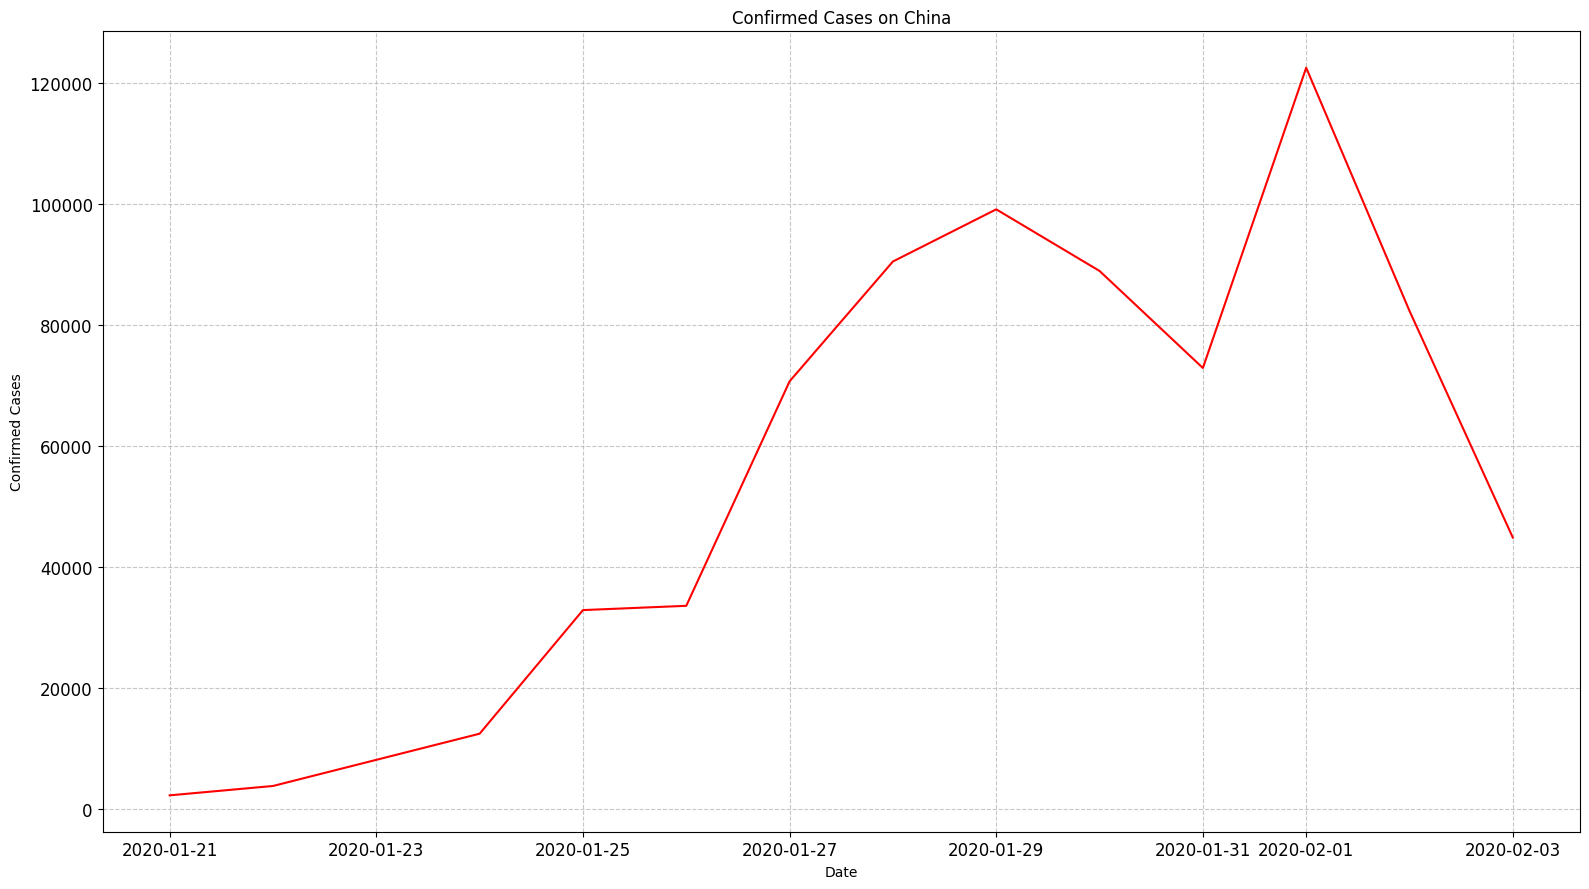

In [164]:
x = china_df.loc[china_df['Confirmed'].notna(), 'Last Update']
y = china_df.loc[china_df['Confirmed'].notna(), 'Confirmed']

# Chamando a função plotTimeSeries com os argumentos necessários, incluindo a cor
plotTimeSeries(x=x, y=y, title='Confirmed Cases on China', AxisX='Date', AxisY='Confirmed Cases', save='./graphs/Confirmed-cases-China.png')

## Other Countries

array(['Hong Kong', 'Macau', 'Taiwan', 'United States', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Australia', 'Germany', 'Philippines', 'Mexico',
       'Brazil', 'Colombia', 'Finland', 'United Arab Emirates', 'India',
       'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium'],
      dtype=object)

C:\Users\ArkadeUser\AppData\Local\Temp\ipykernel_94372\3857591043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Last Update'] = filtered['Last Update'].apply(lambda x: x.split()[0])
C:\Users\ArkadeUser\AppData\Local\Temp\ipykernel_94372\3857591043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Last Update'] = pd.to_datetime(filtered['Last Update'], format='%m/%d/%Y', errors='coerce')
C:\Users\ArkadeUser\AppData\Local\Temp\ipykernel_94372\3857591043.py:12: SettingWithCopyWarni

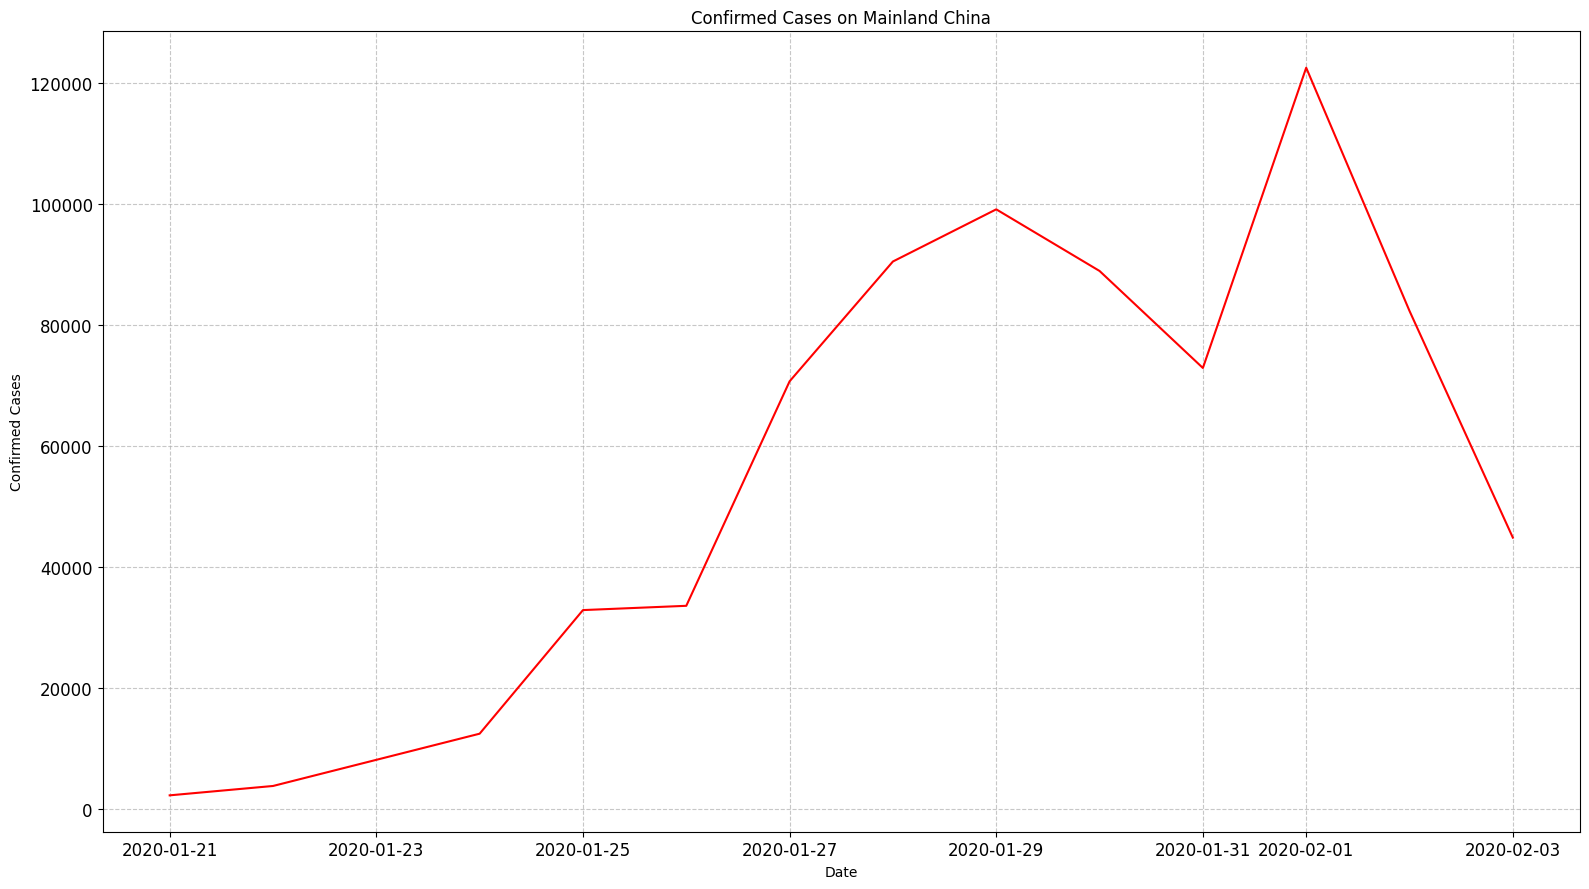

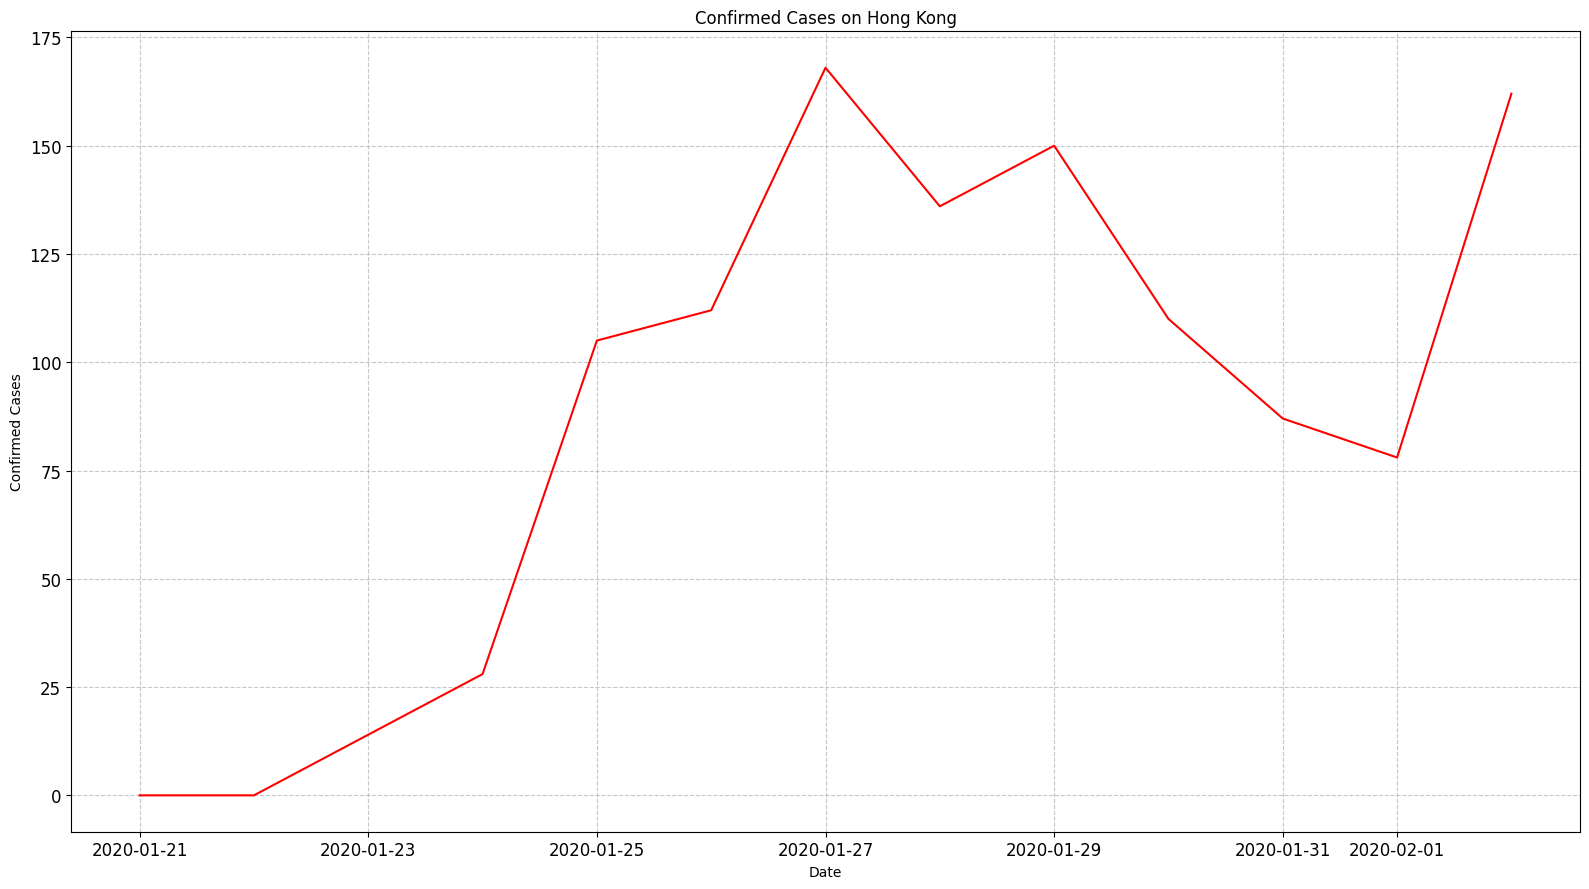

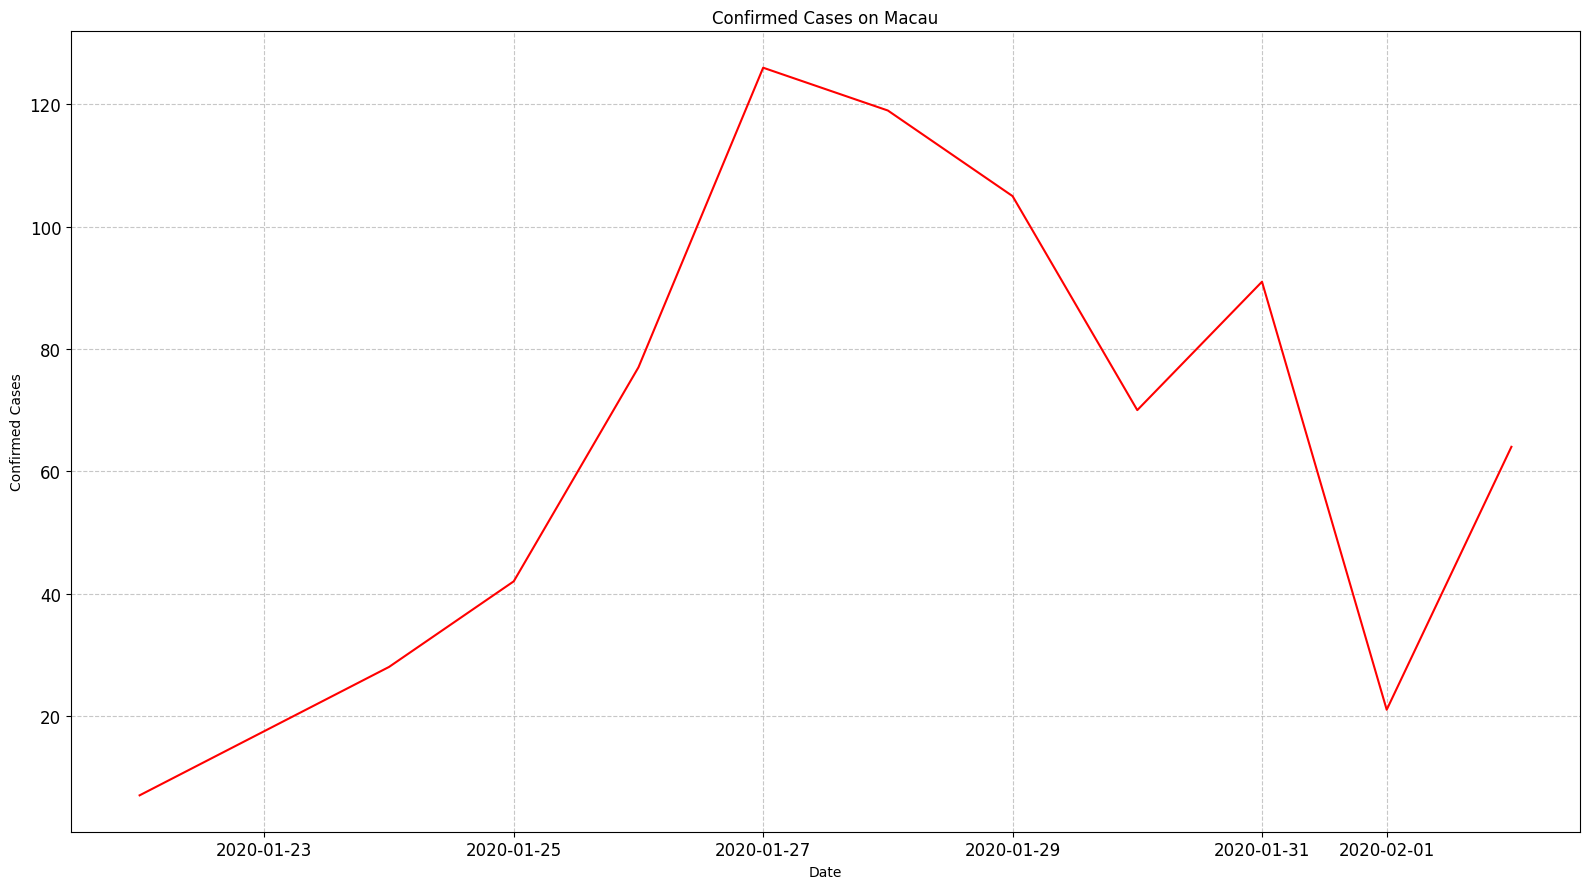

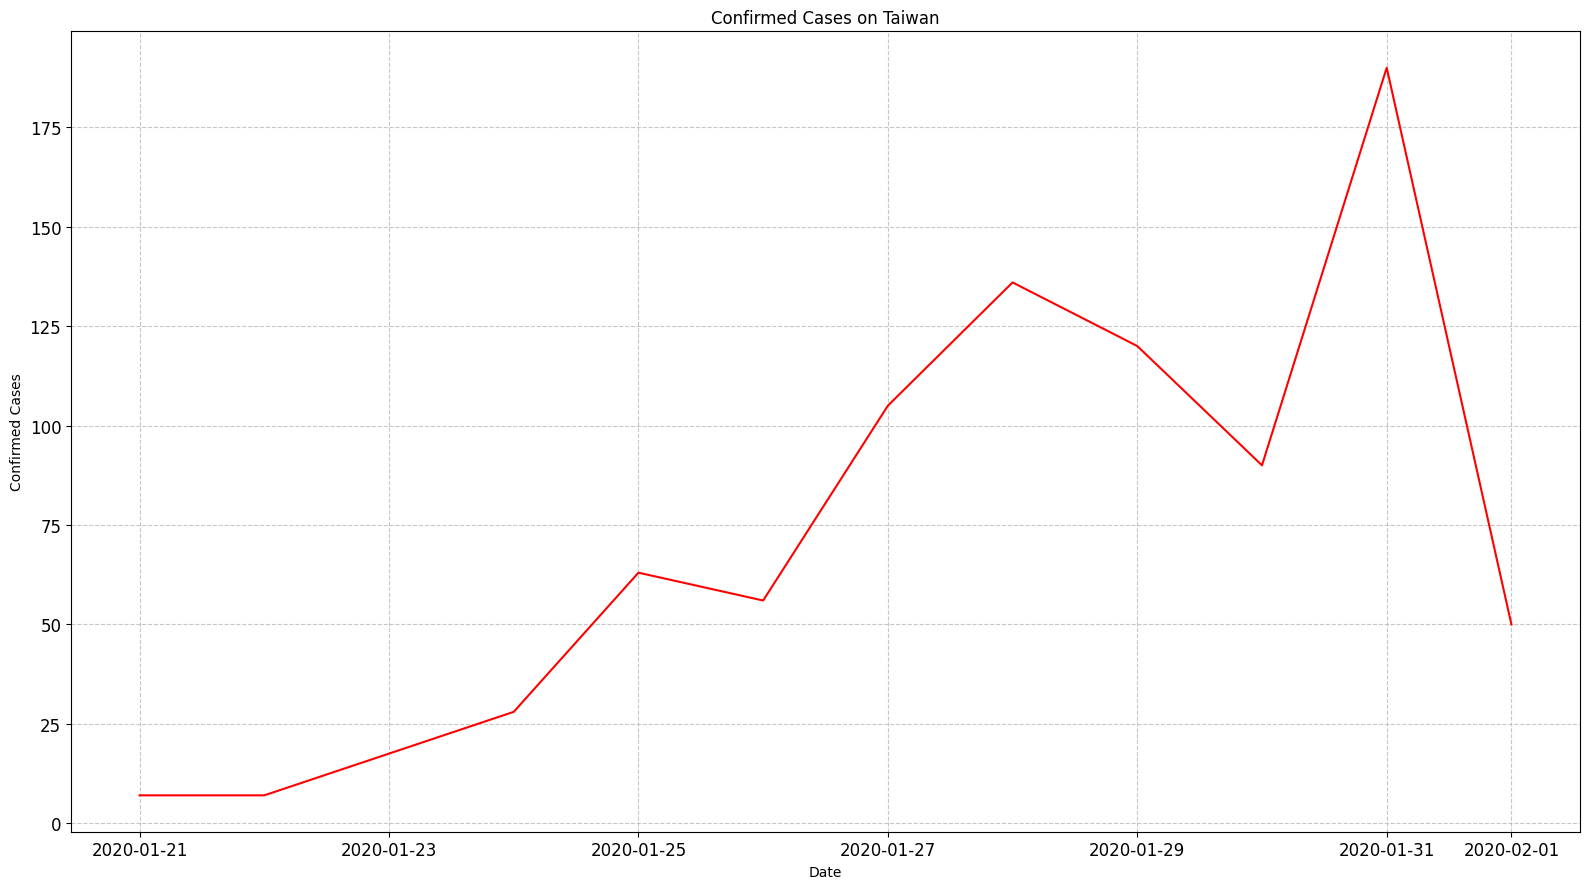

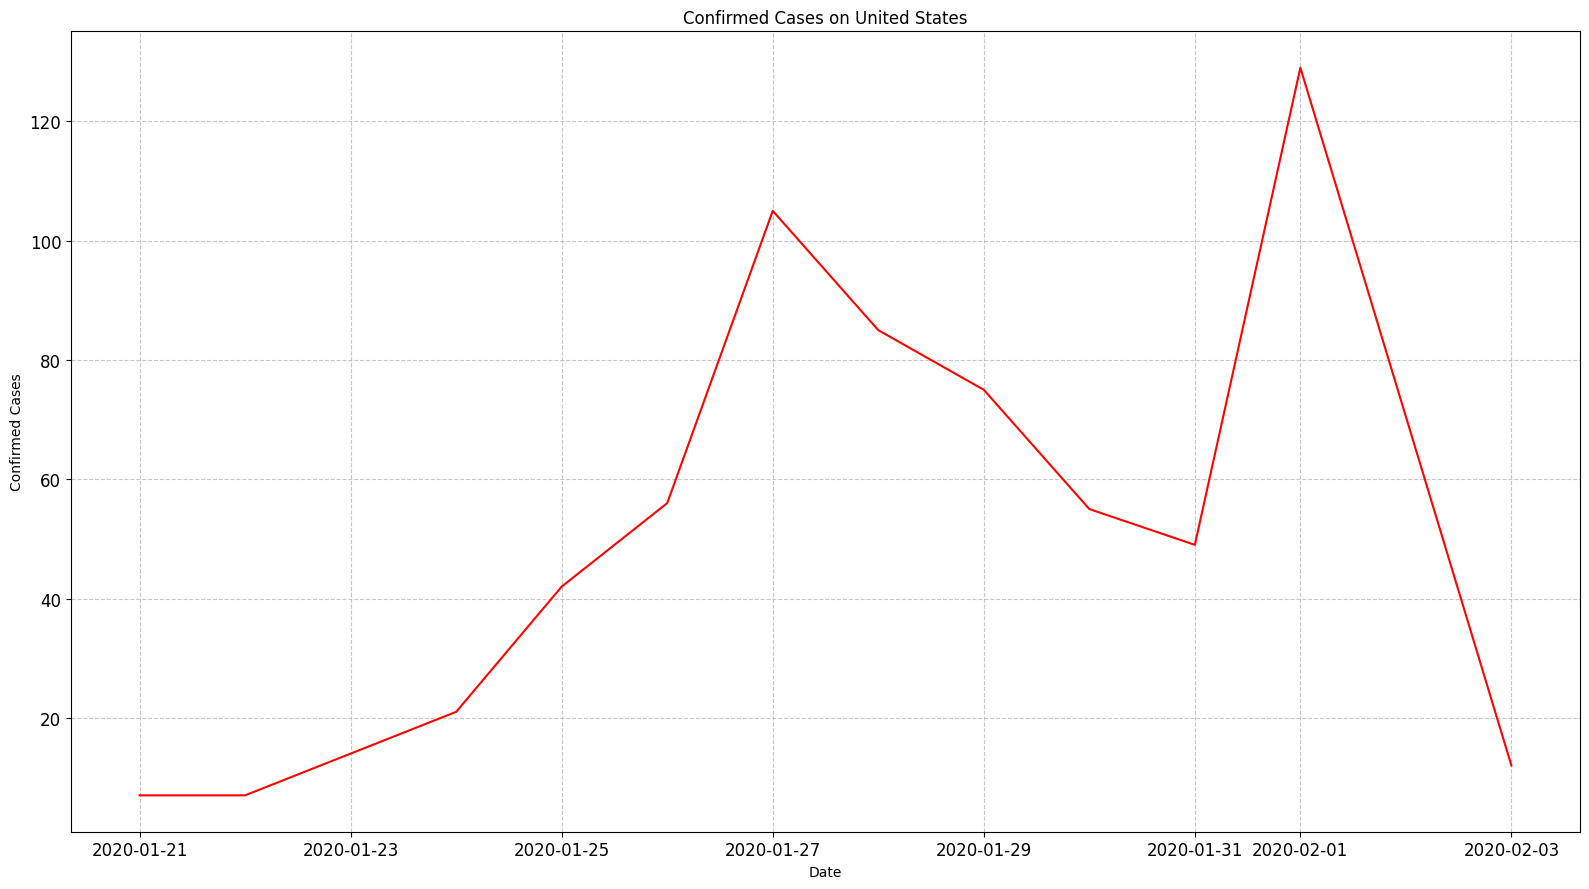

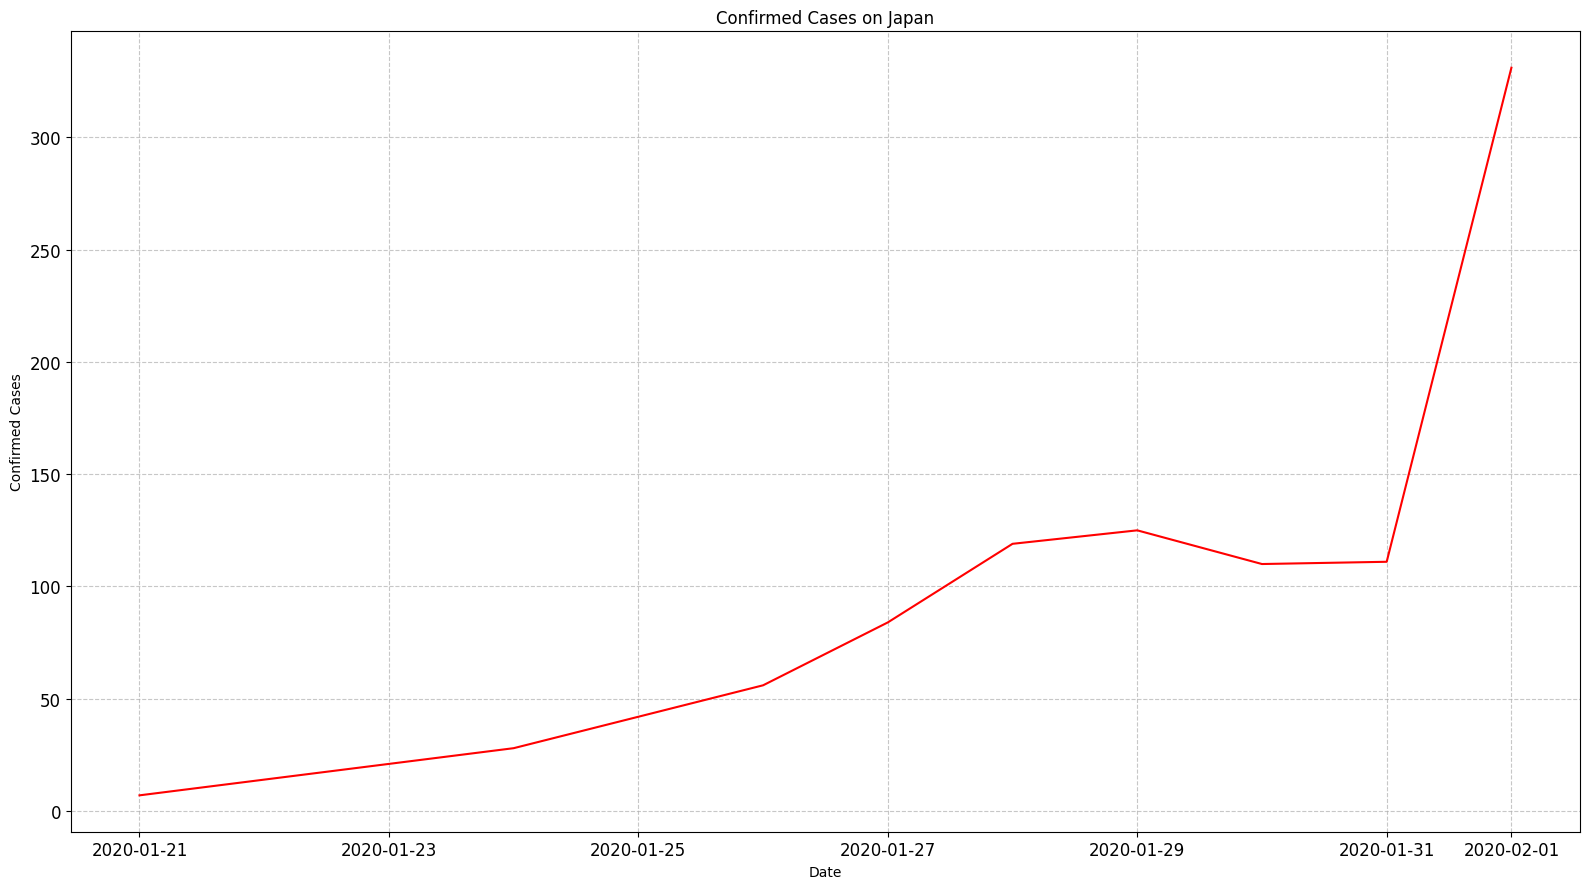

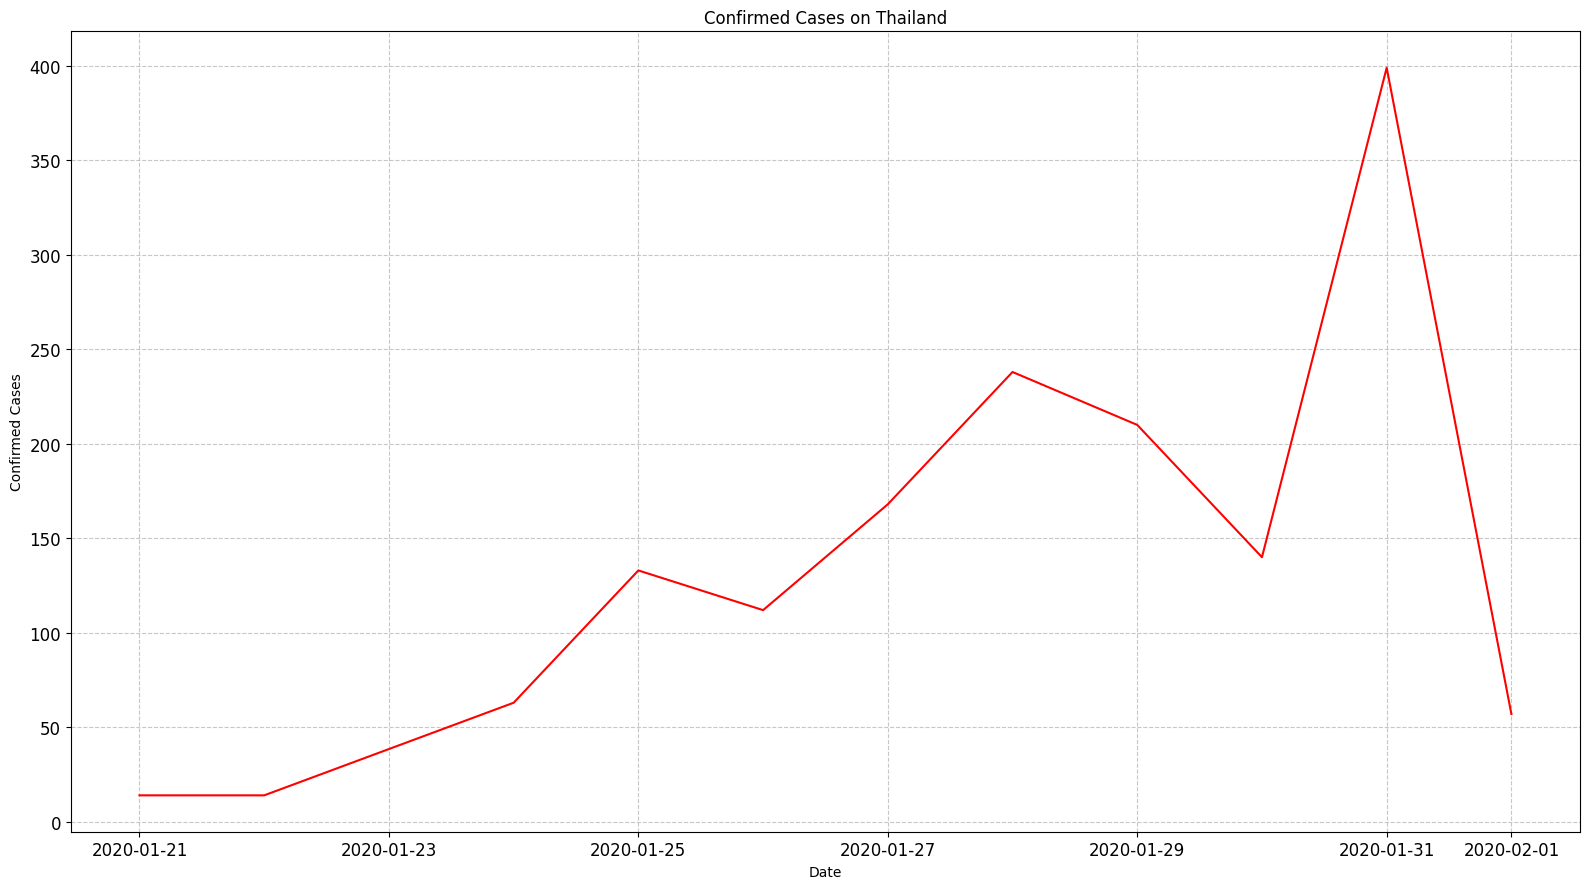

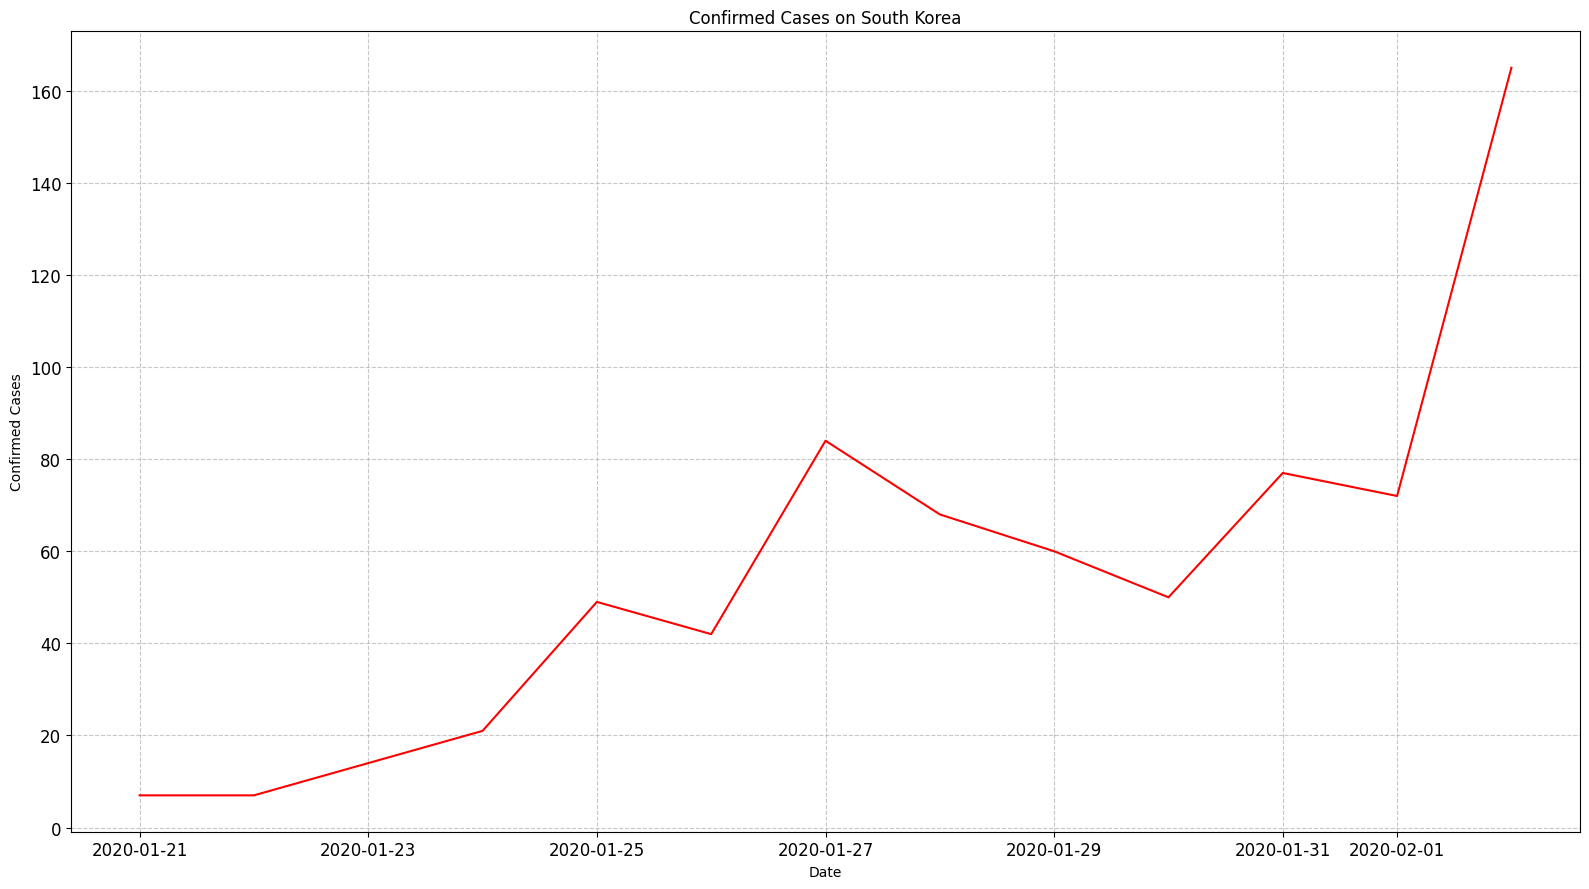

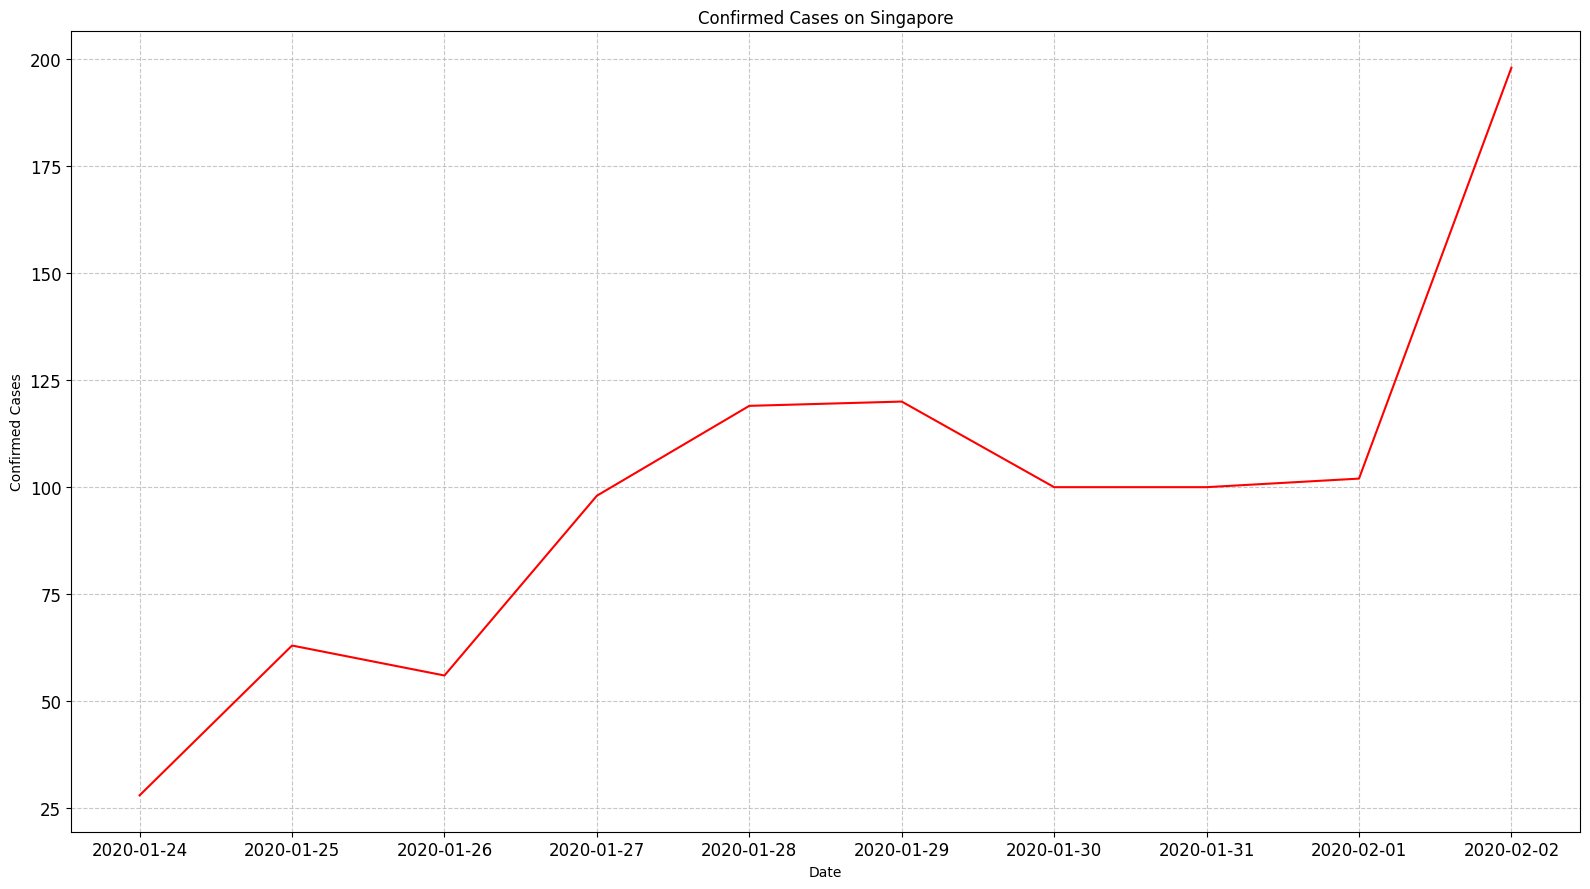

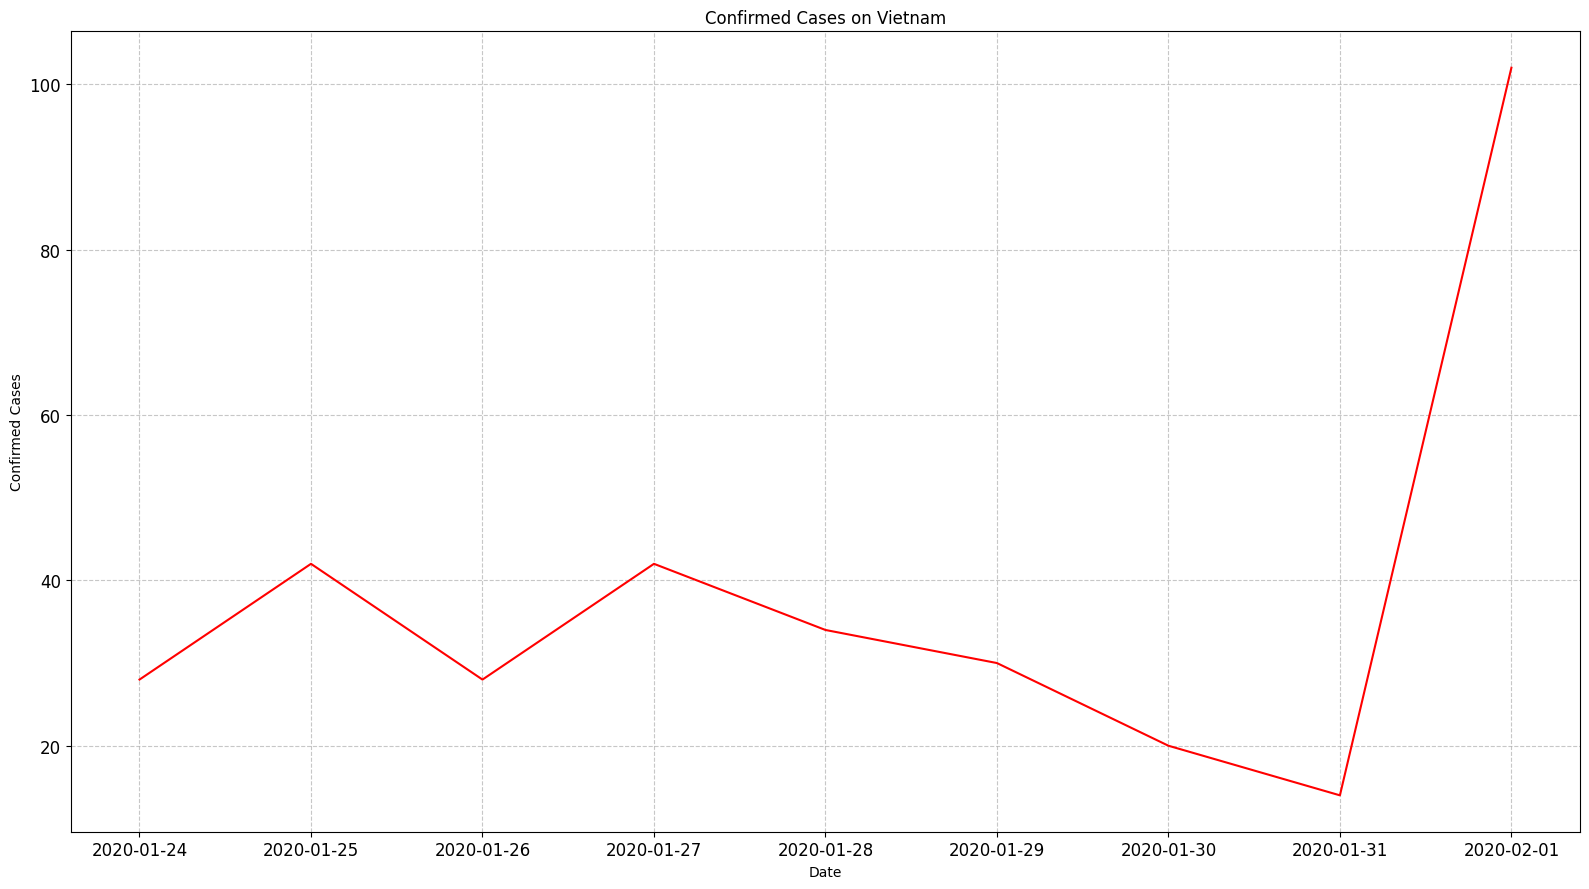

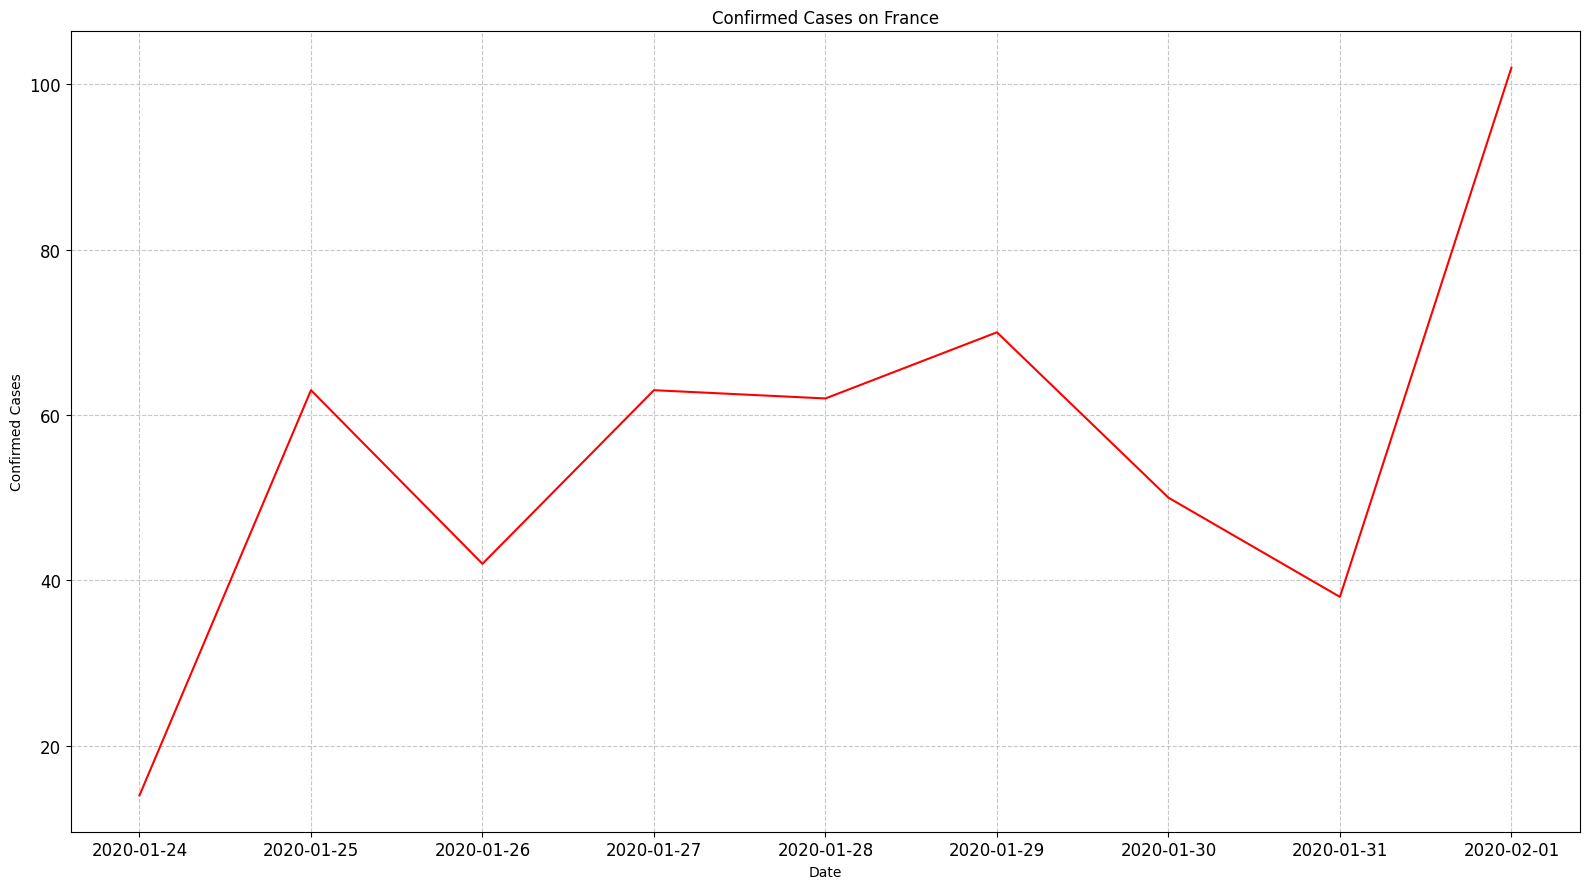

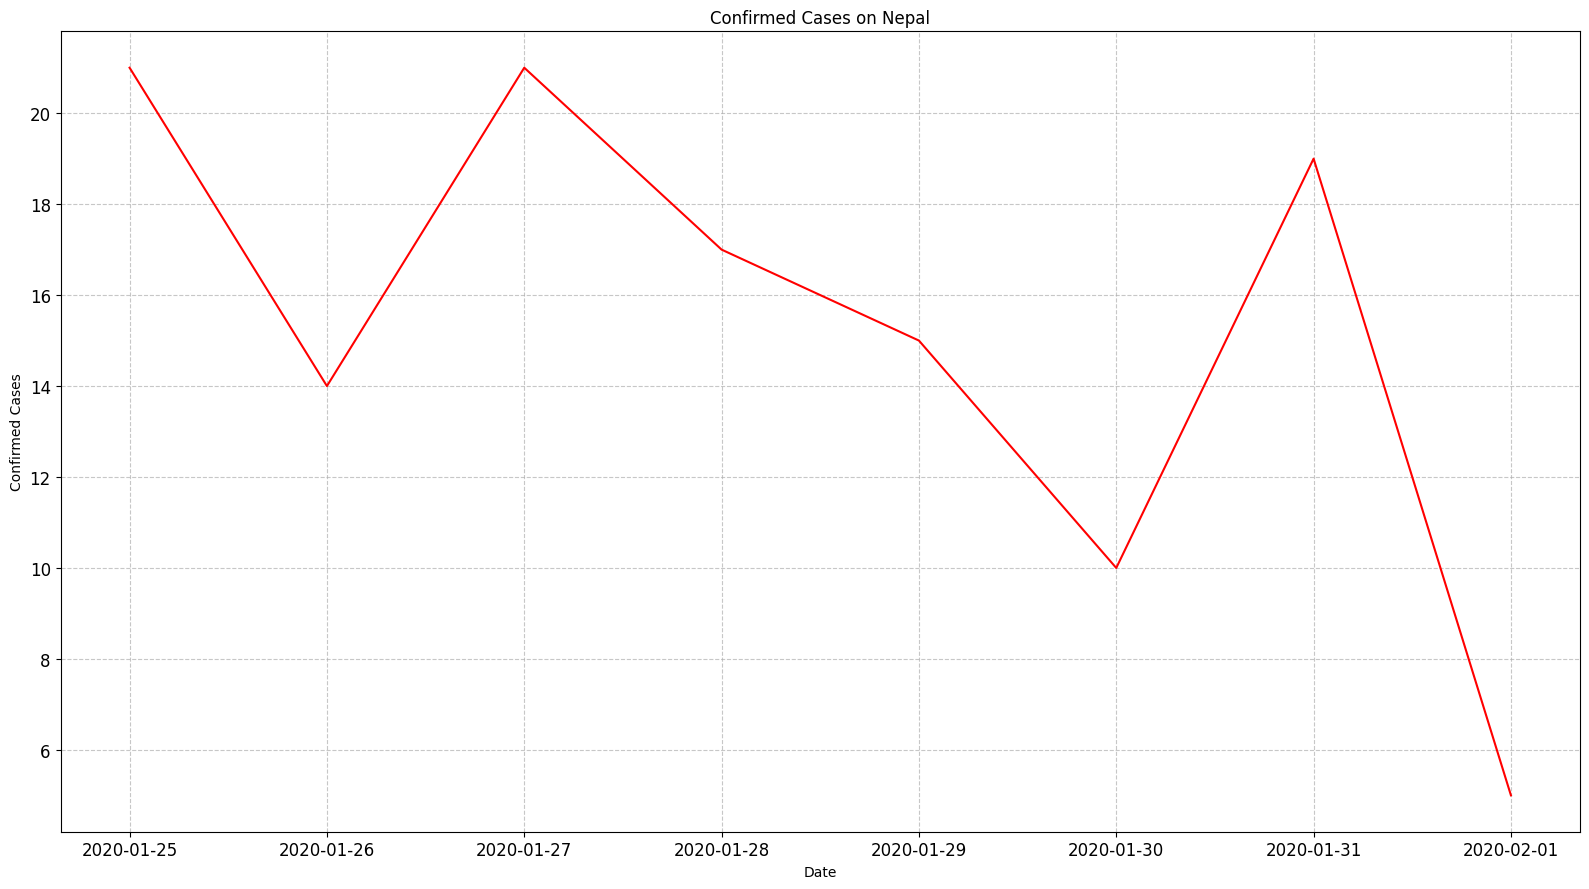

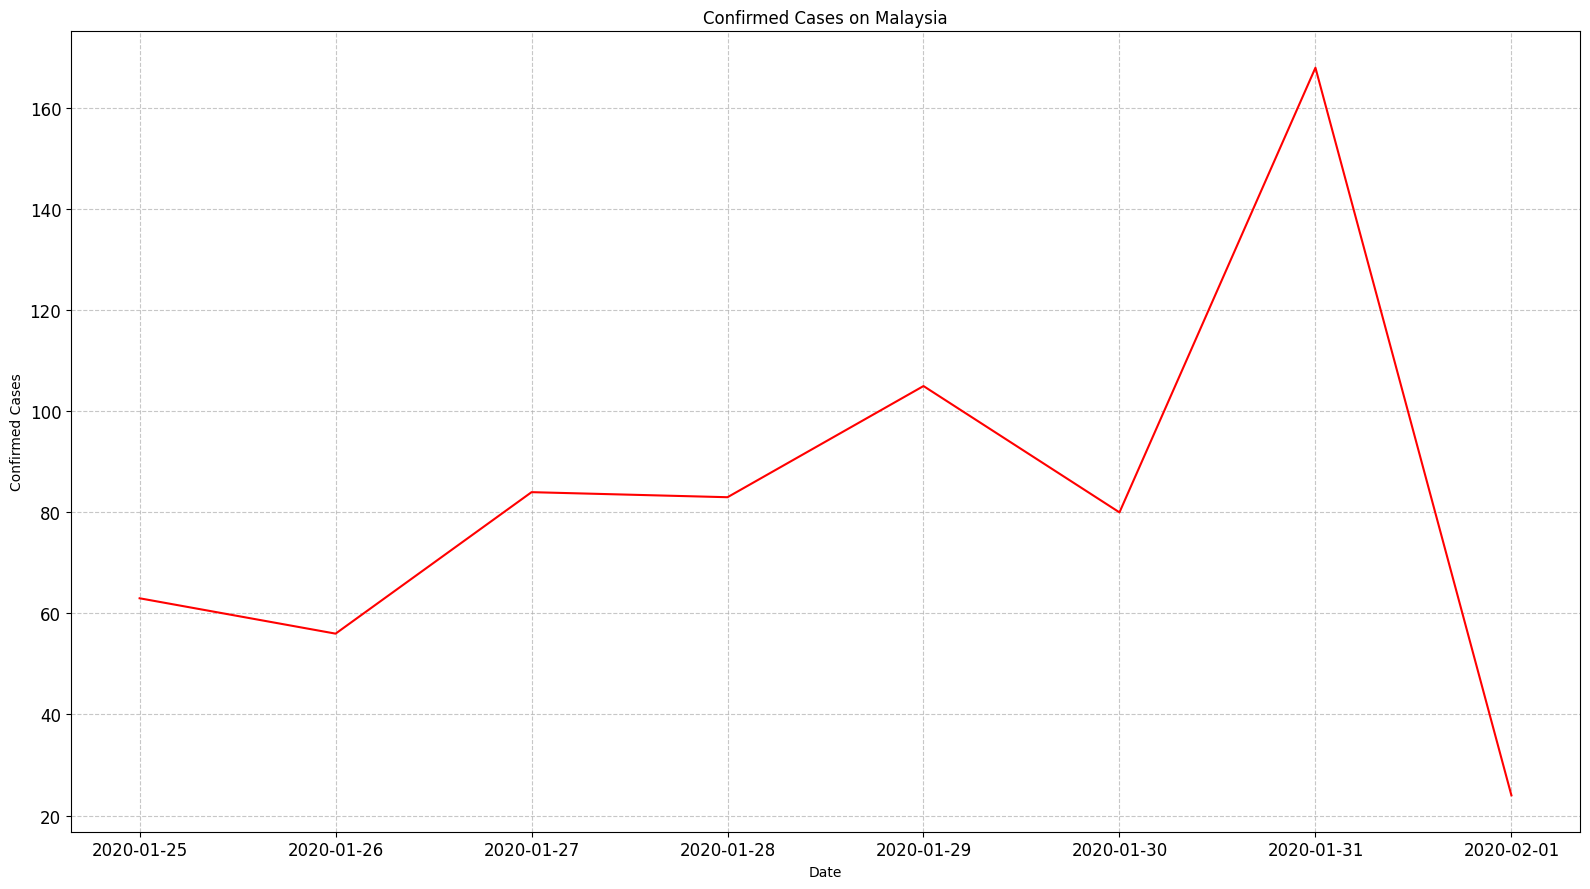

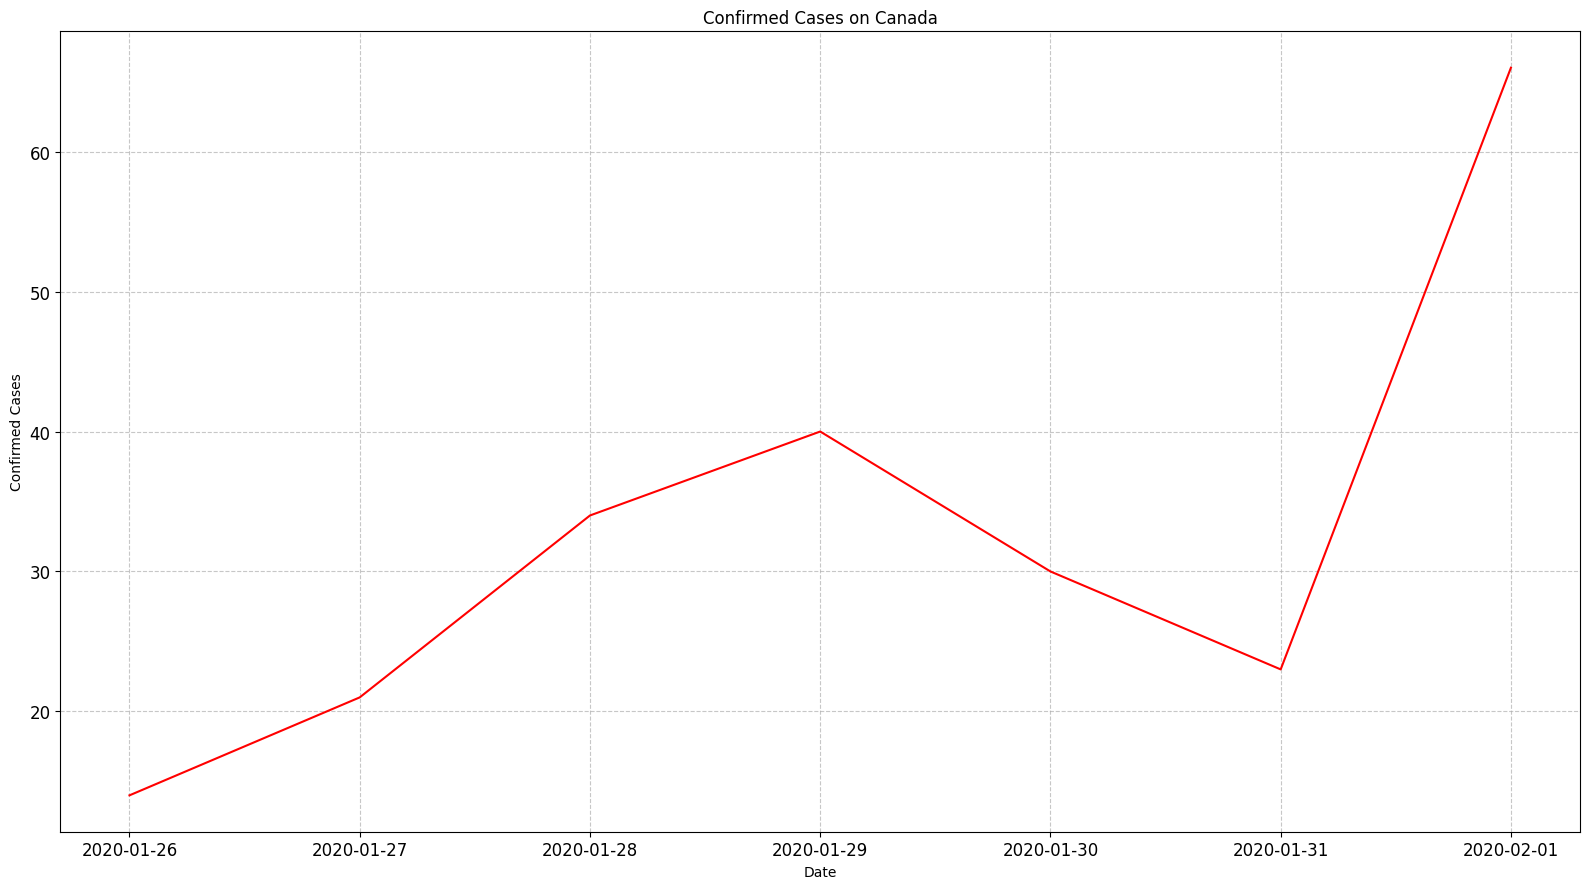

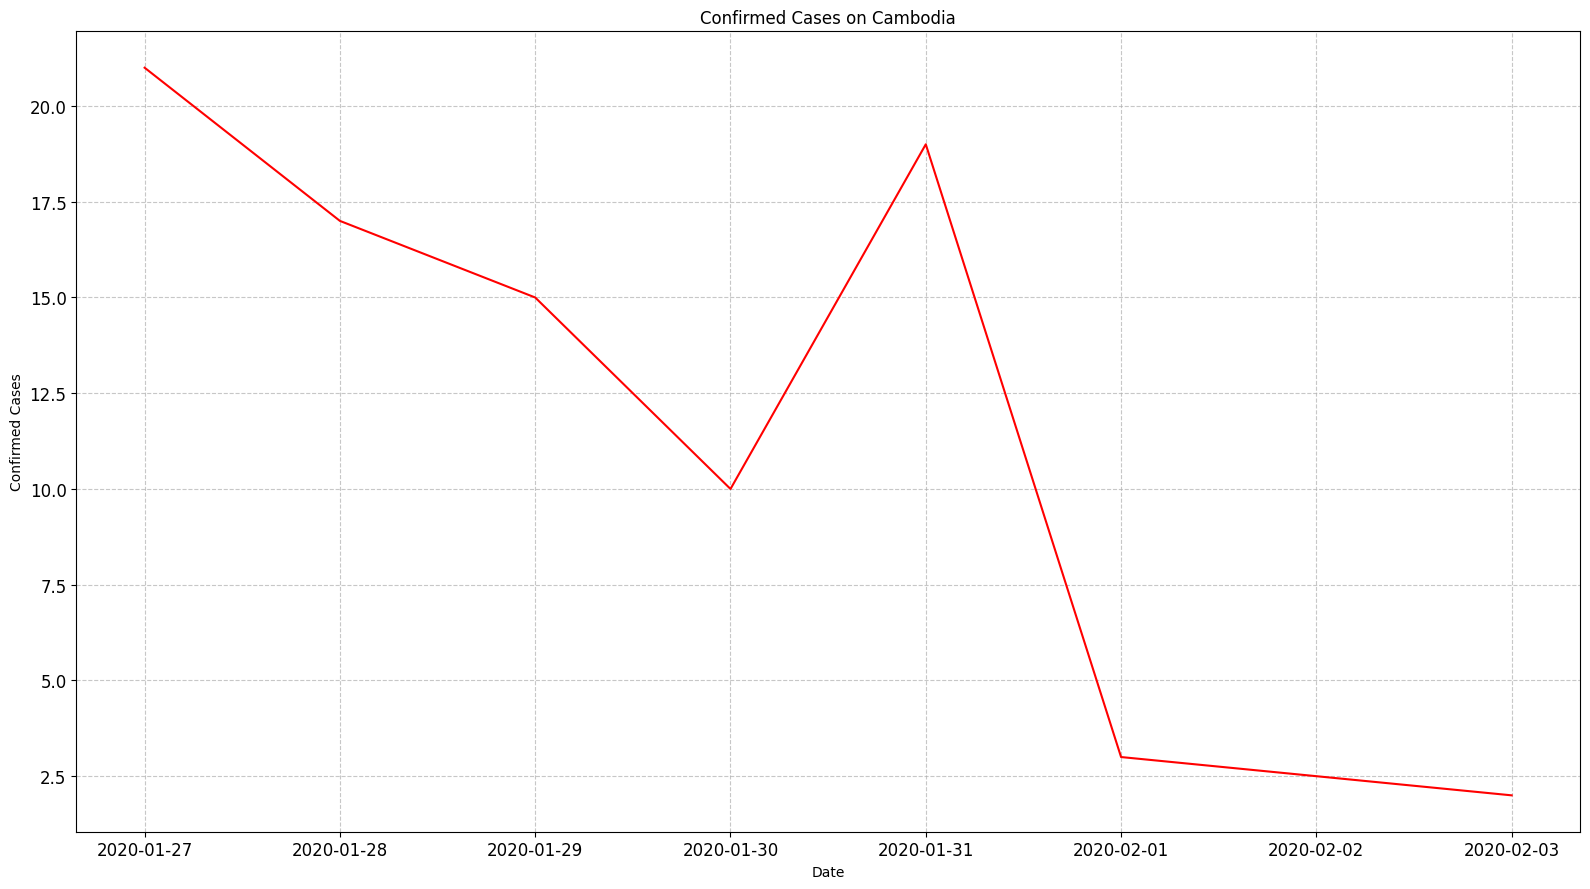

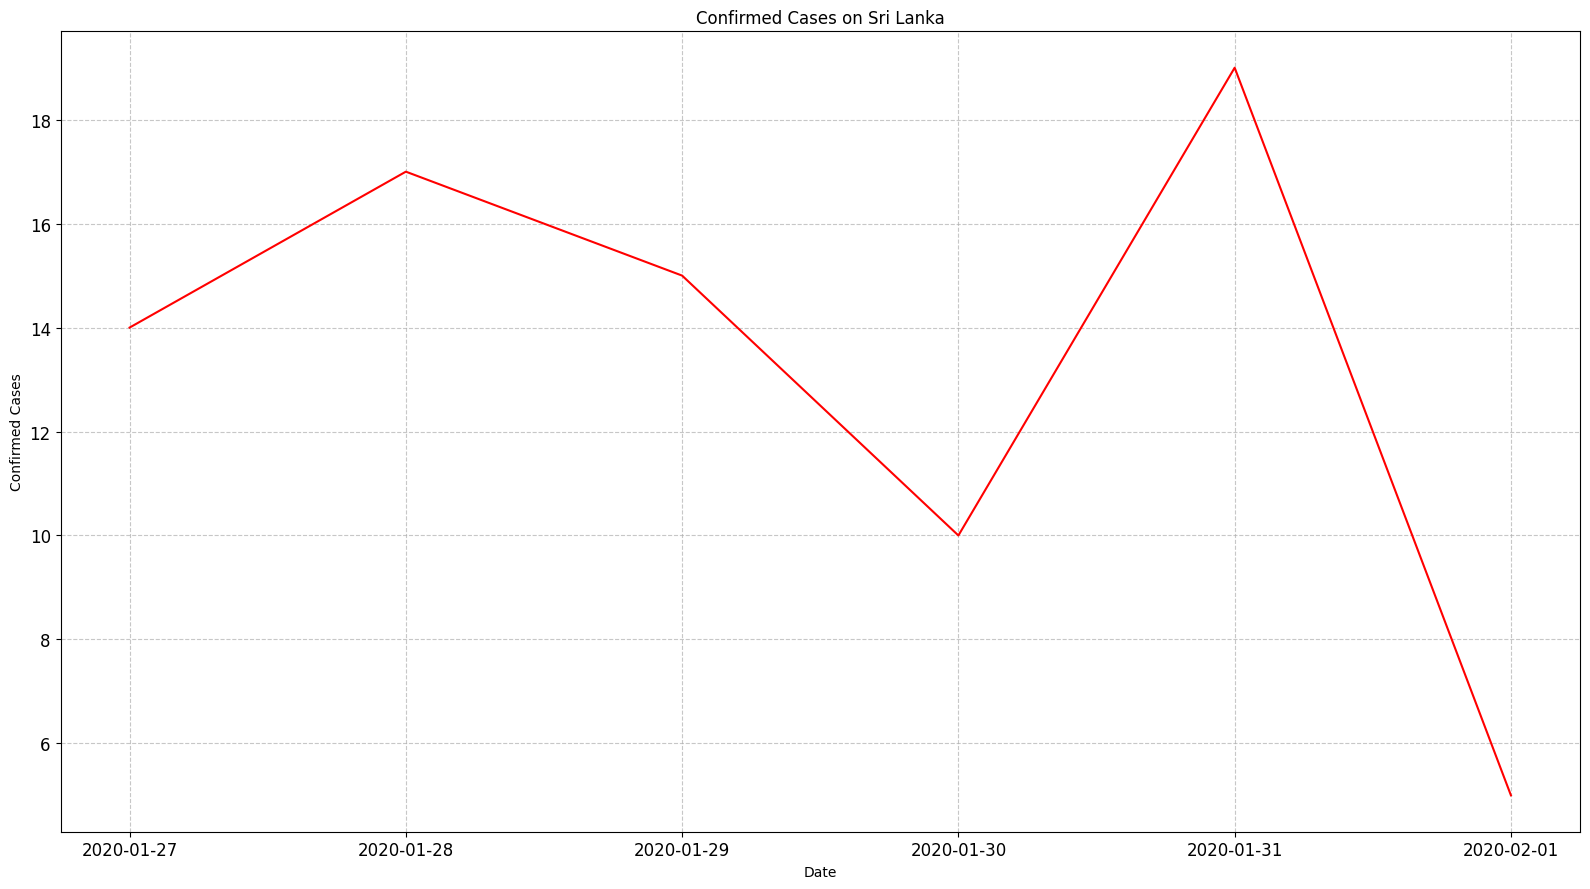

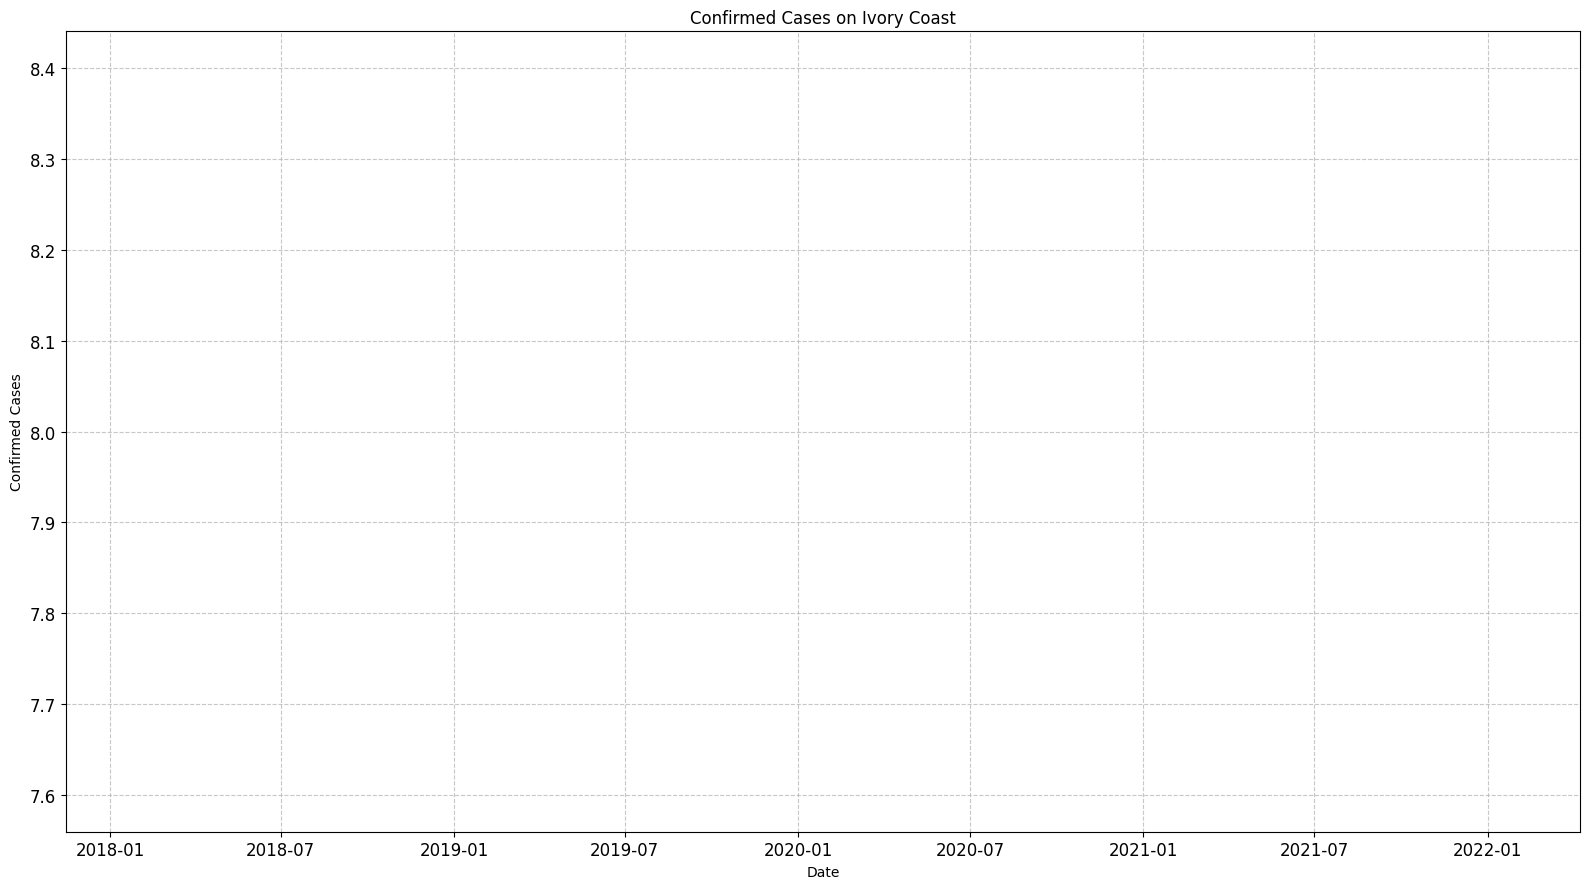

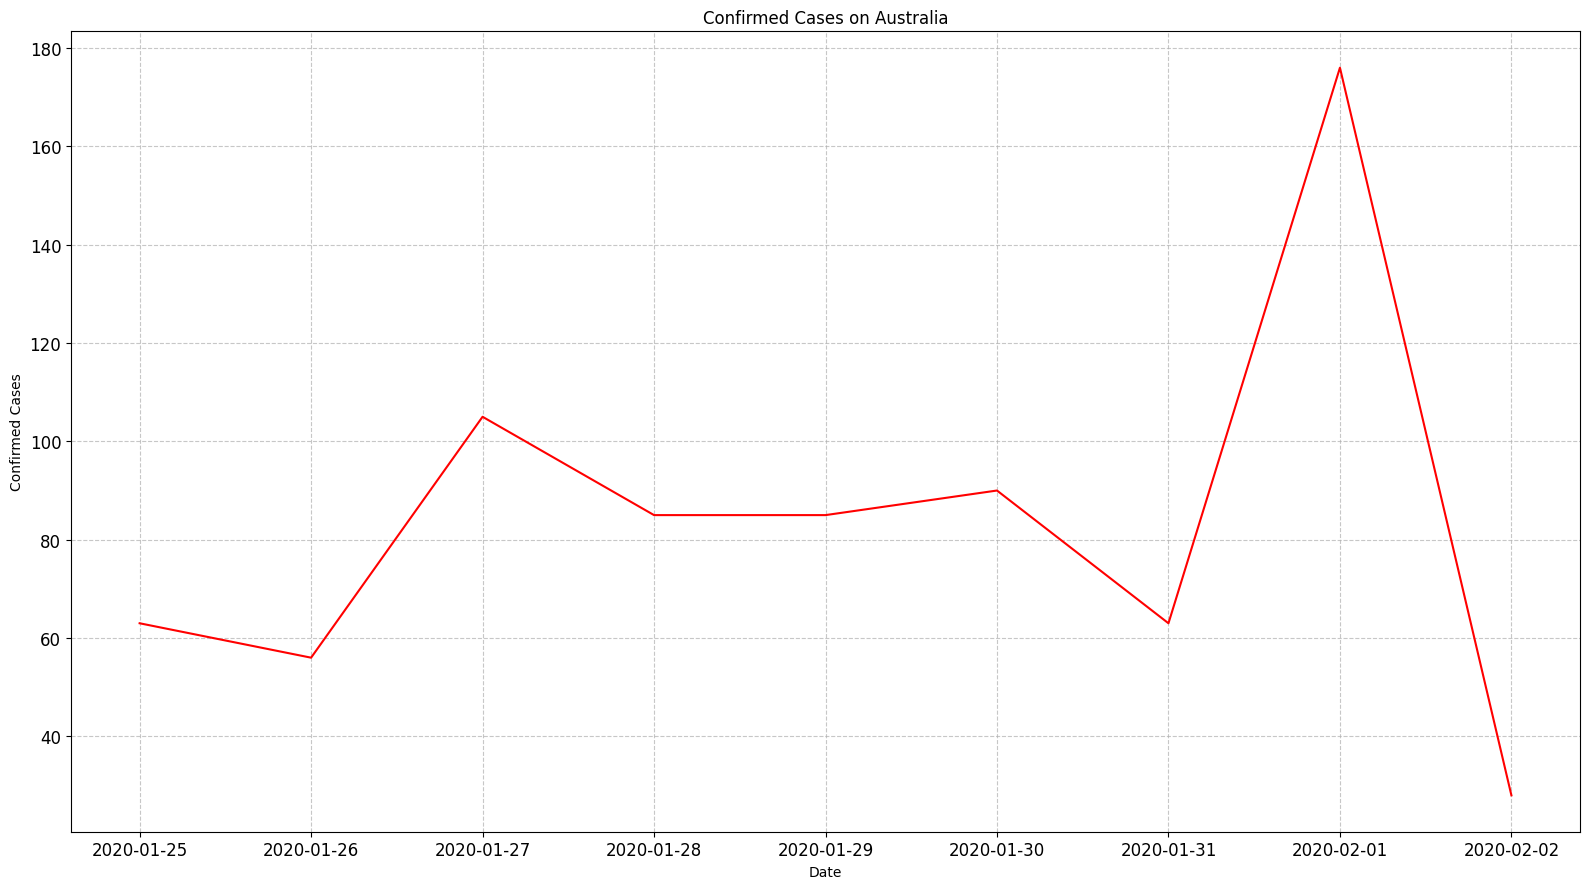

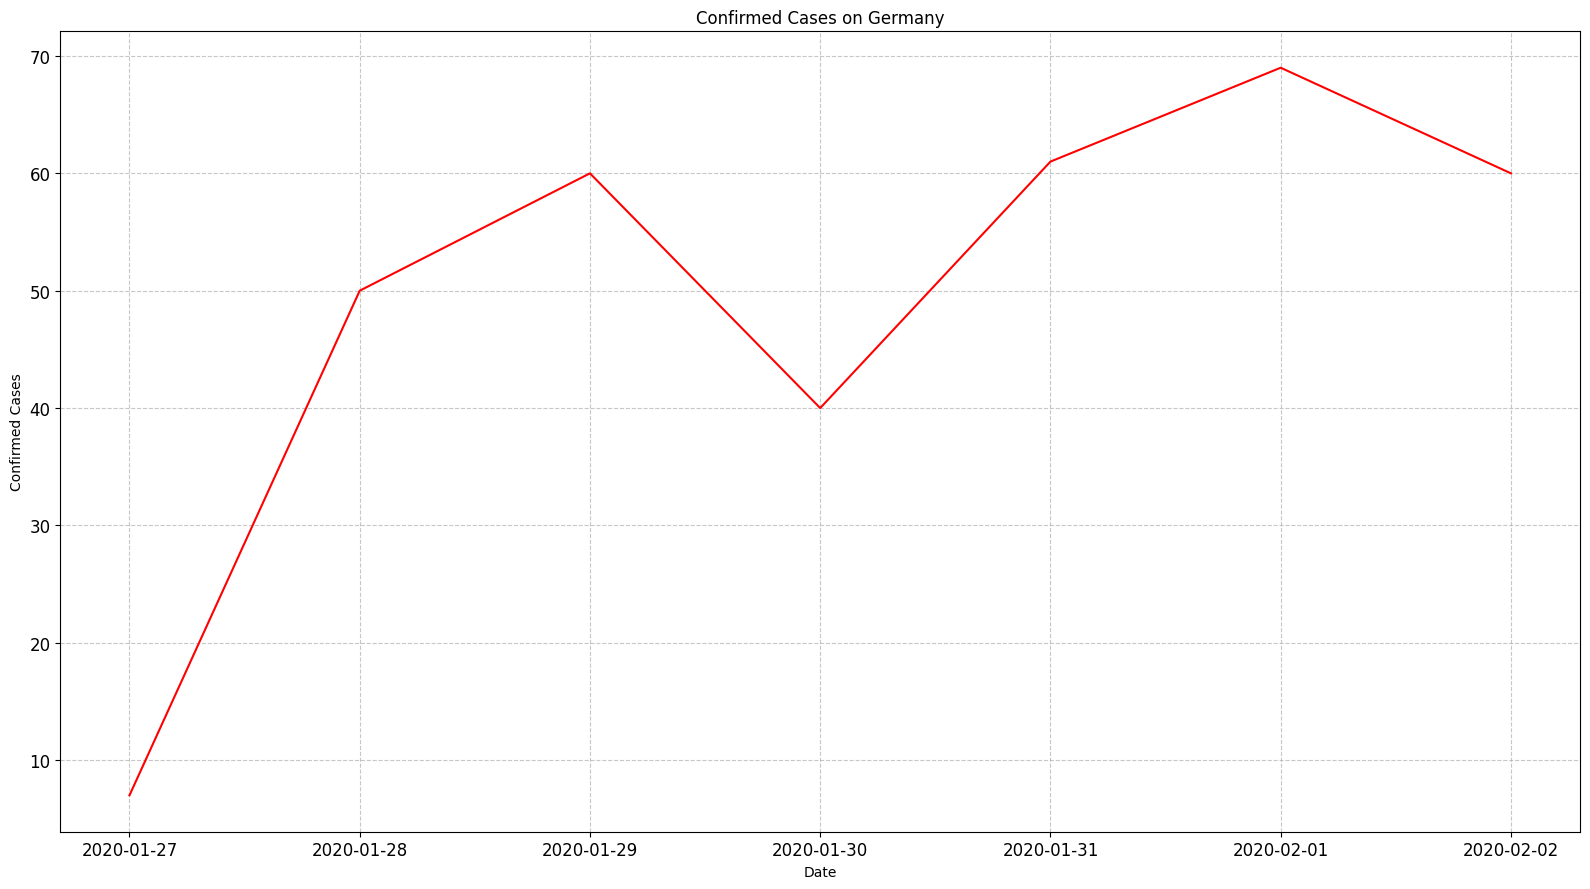

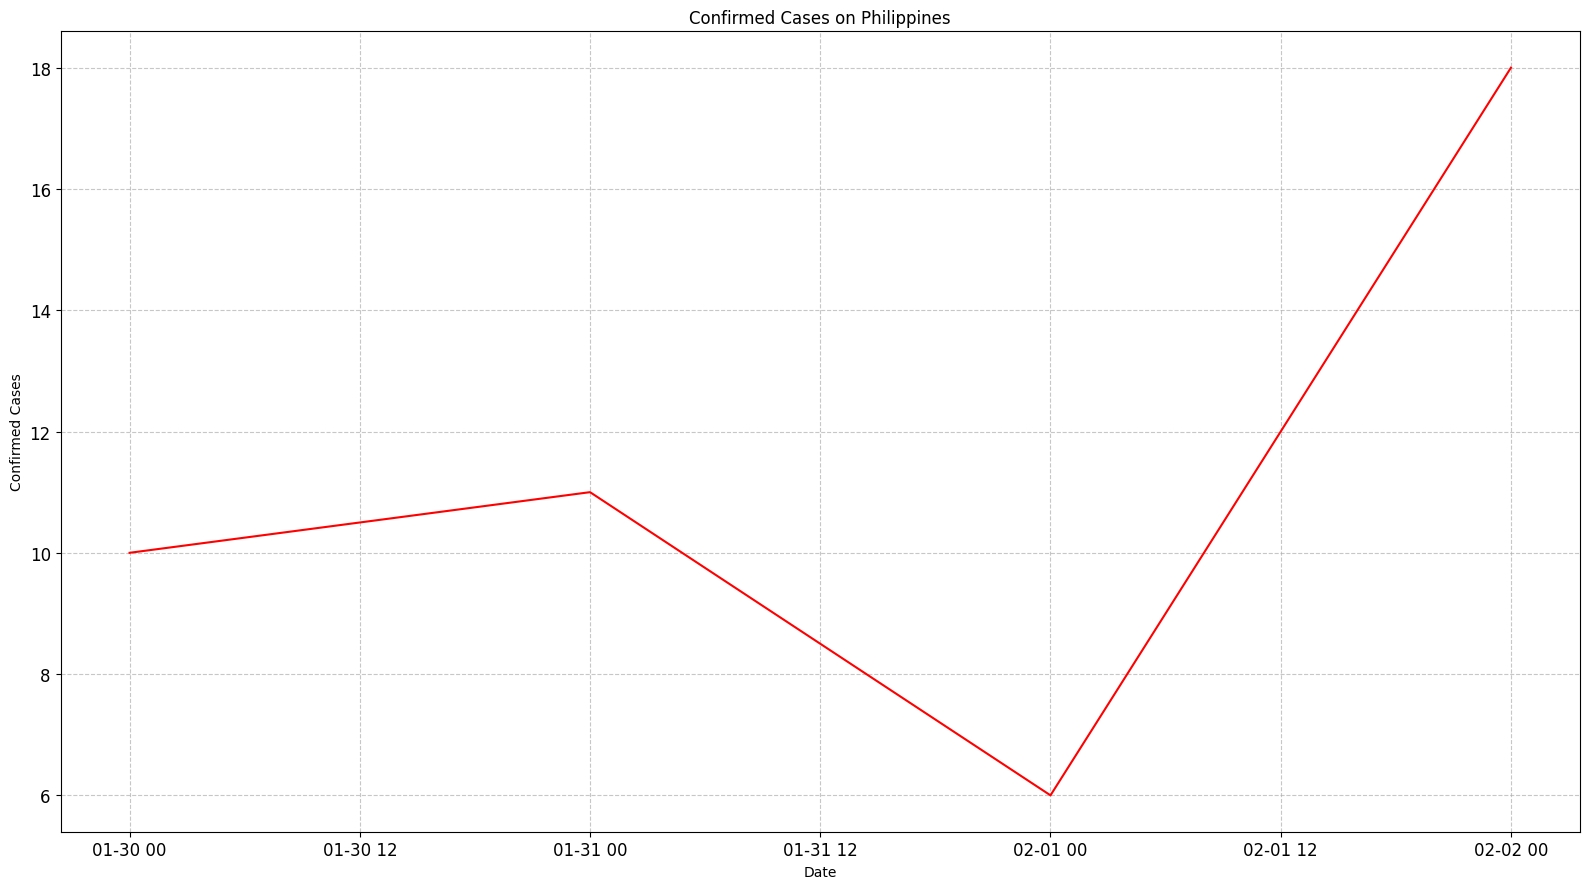

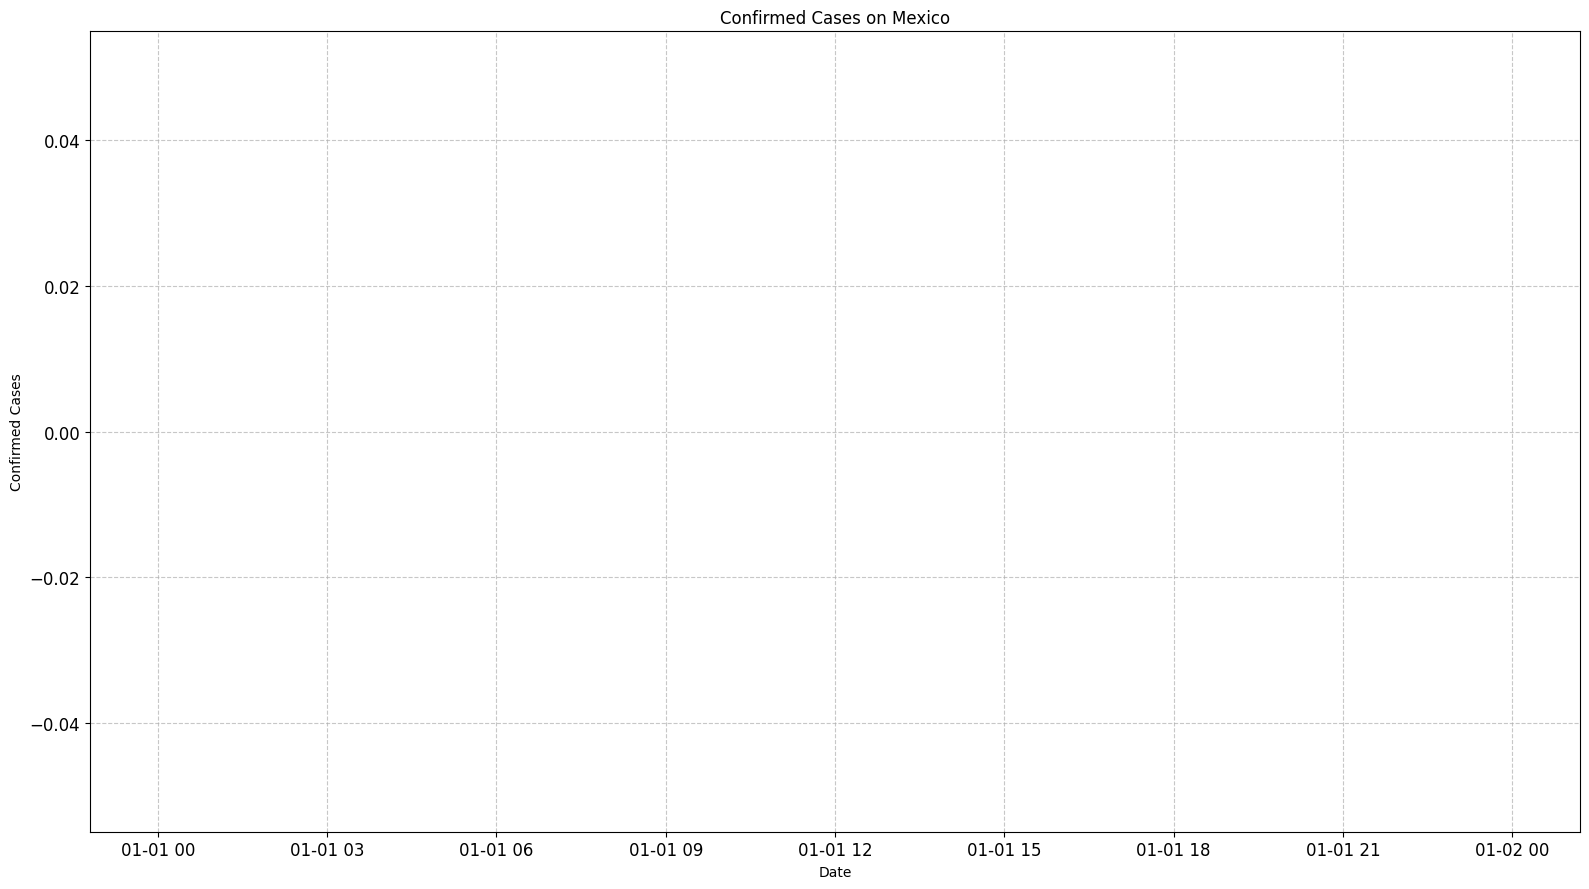

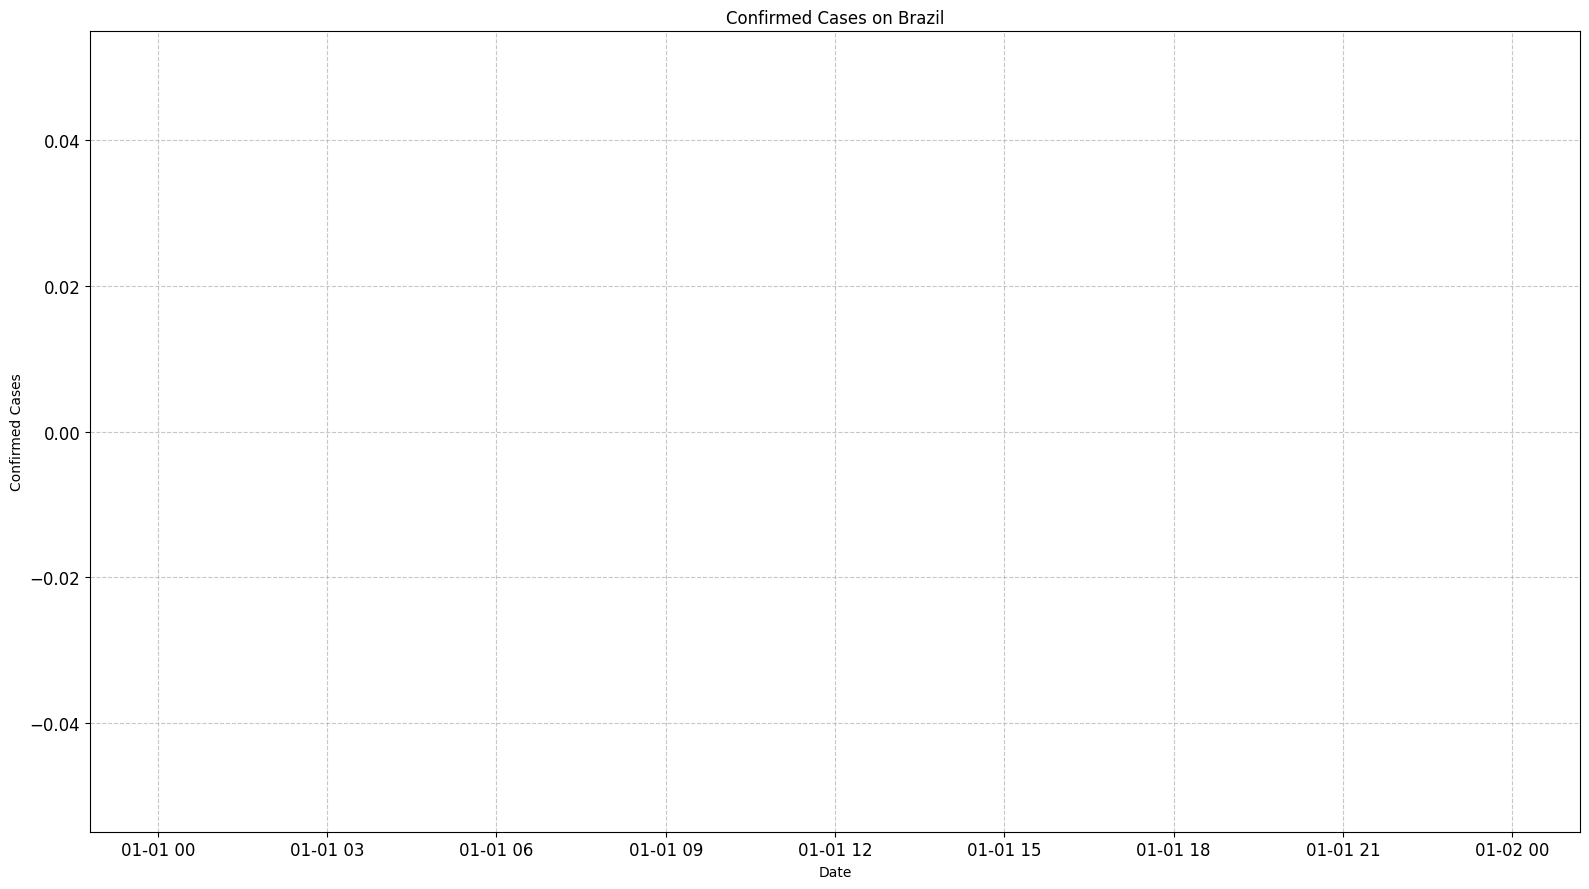

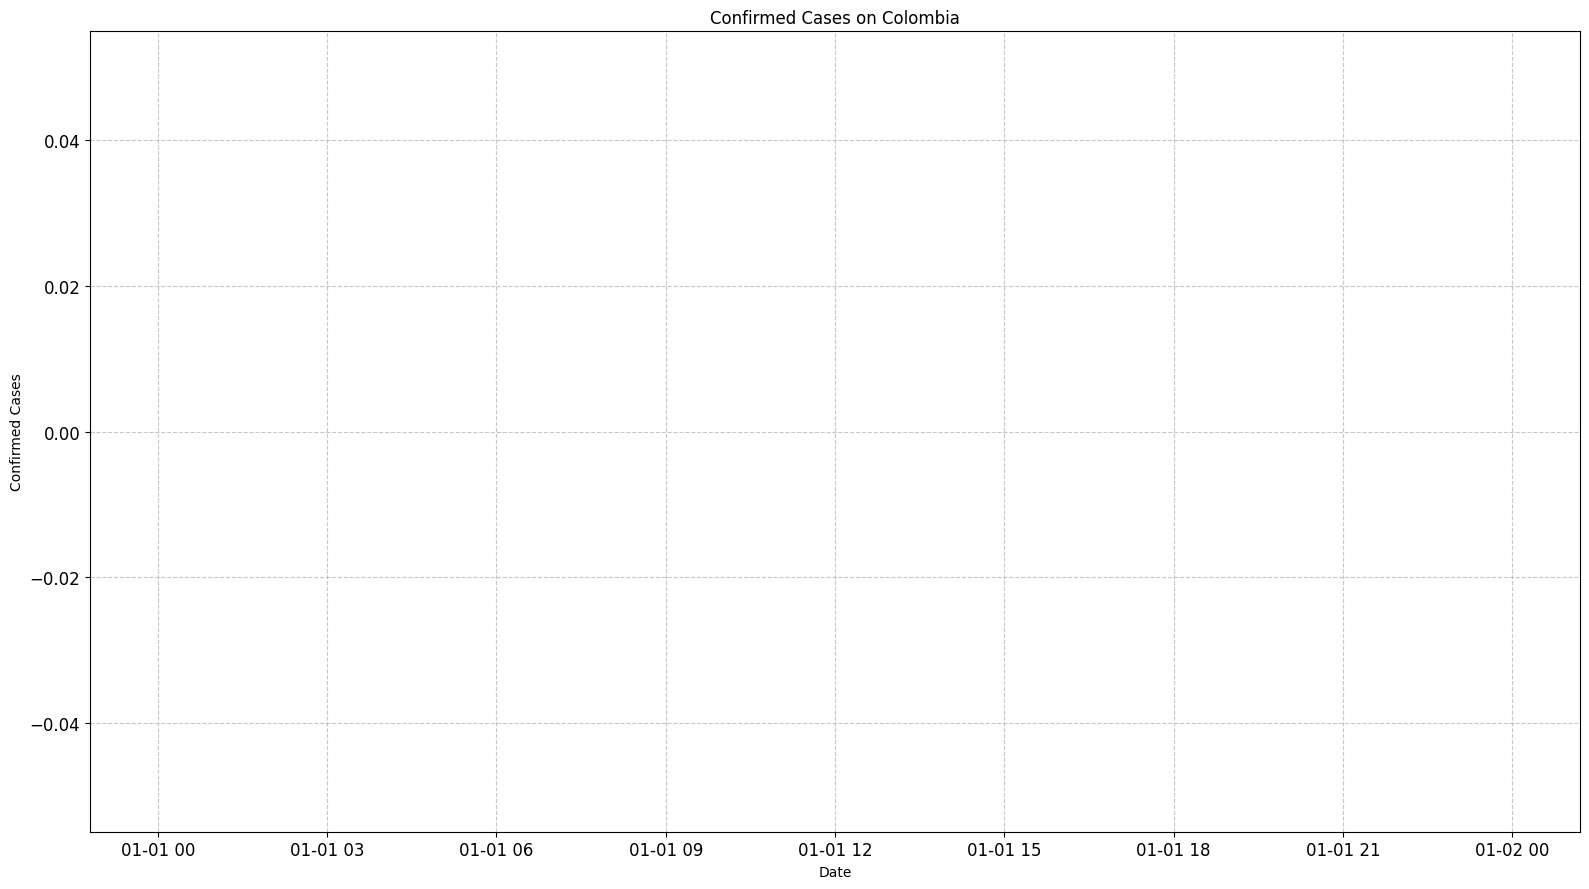

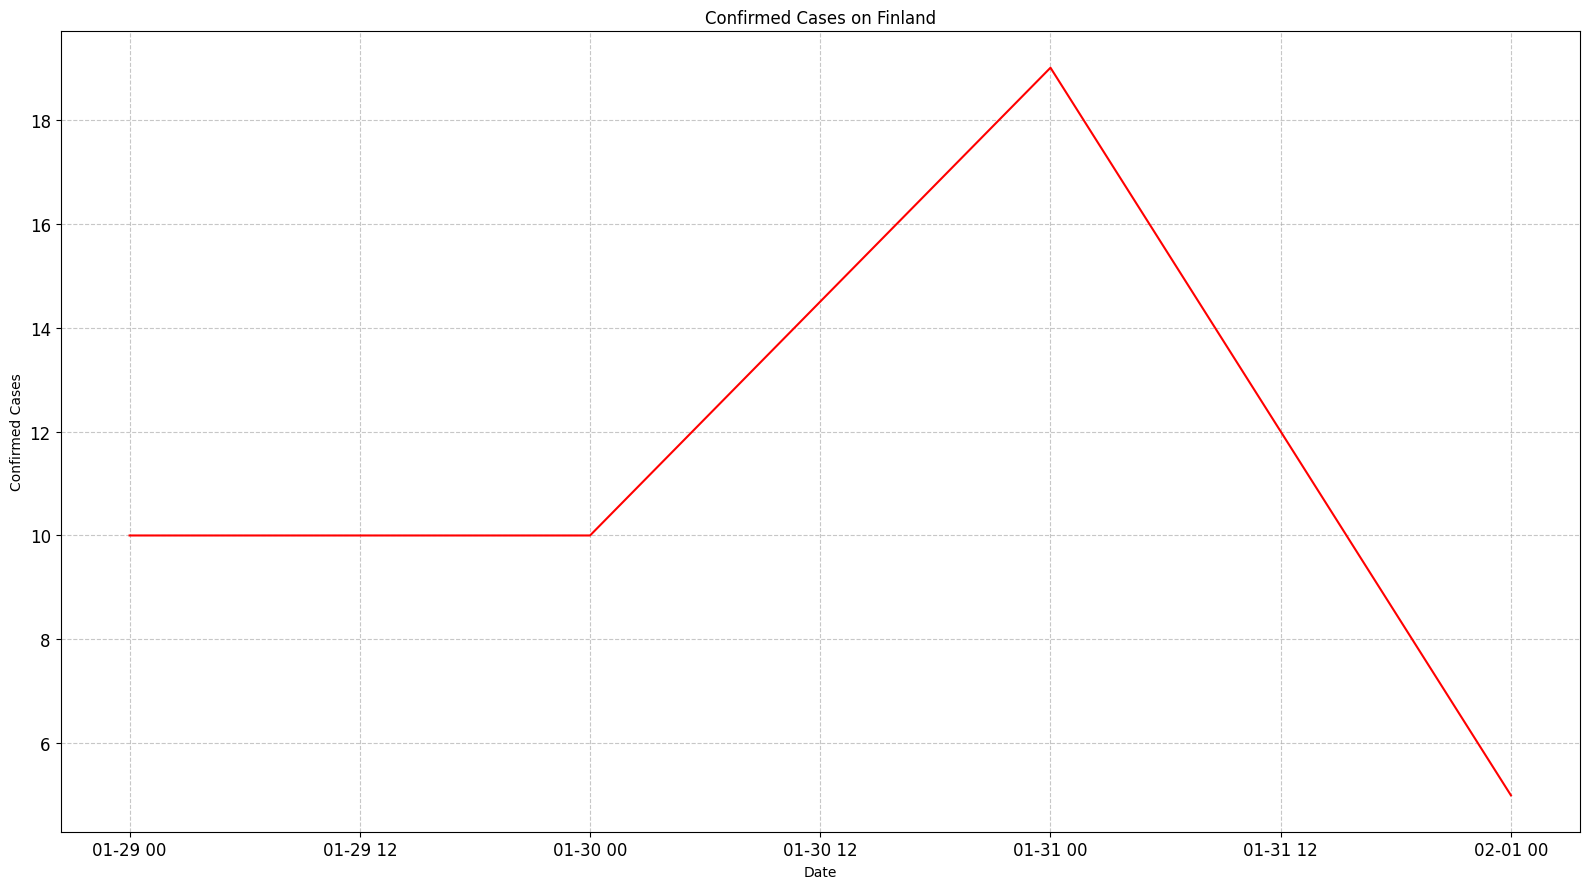

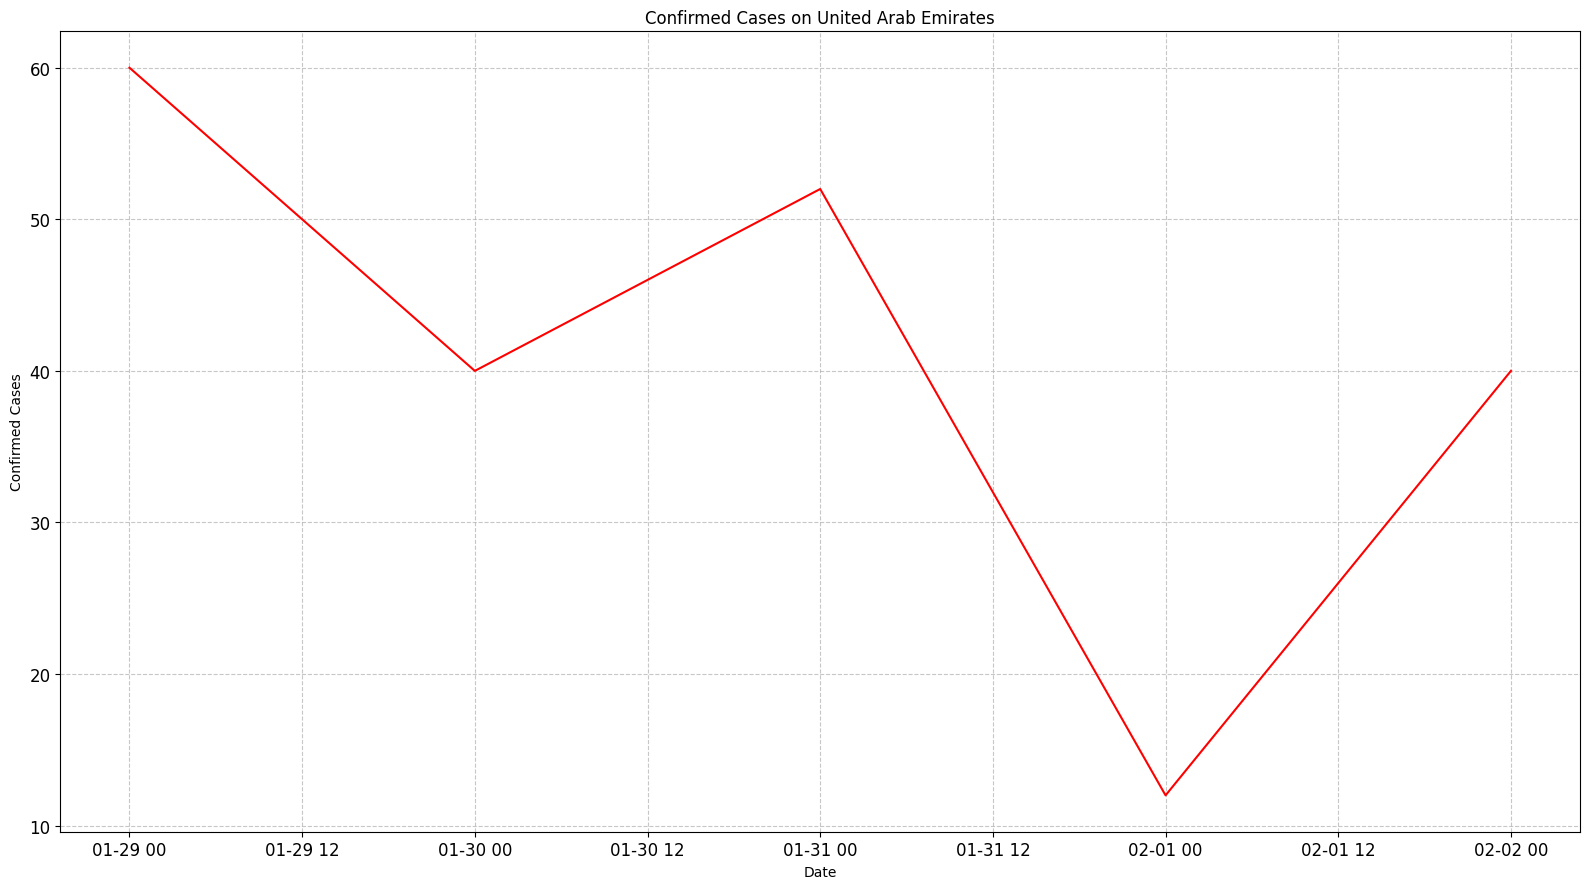

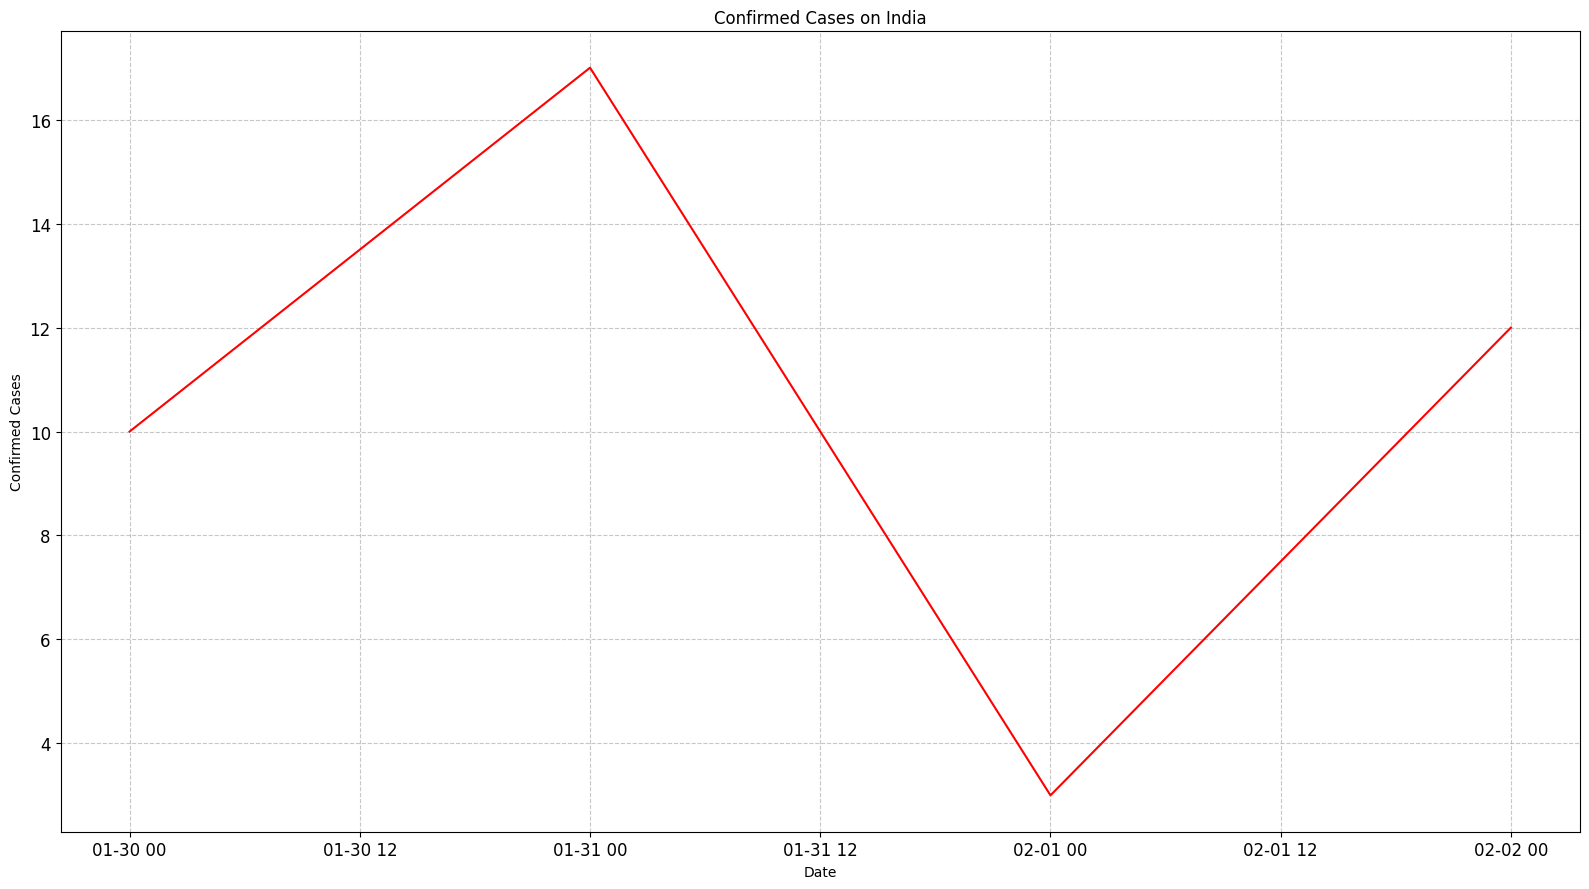

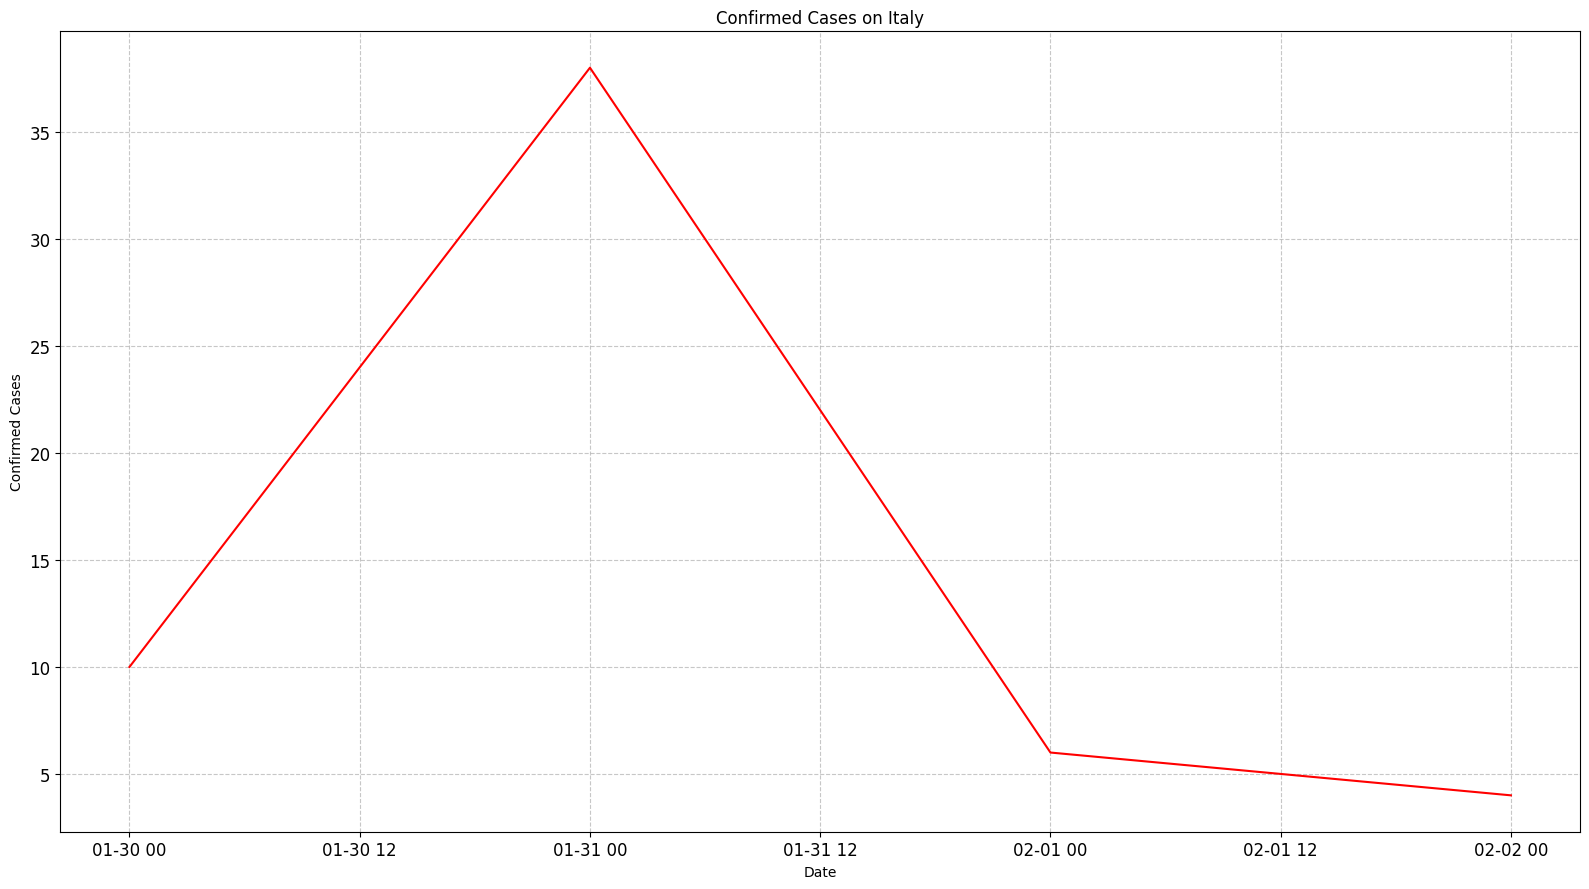

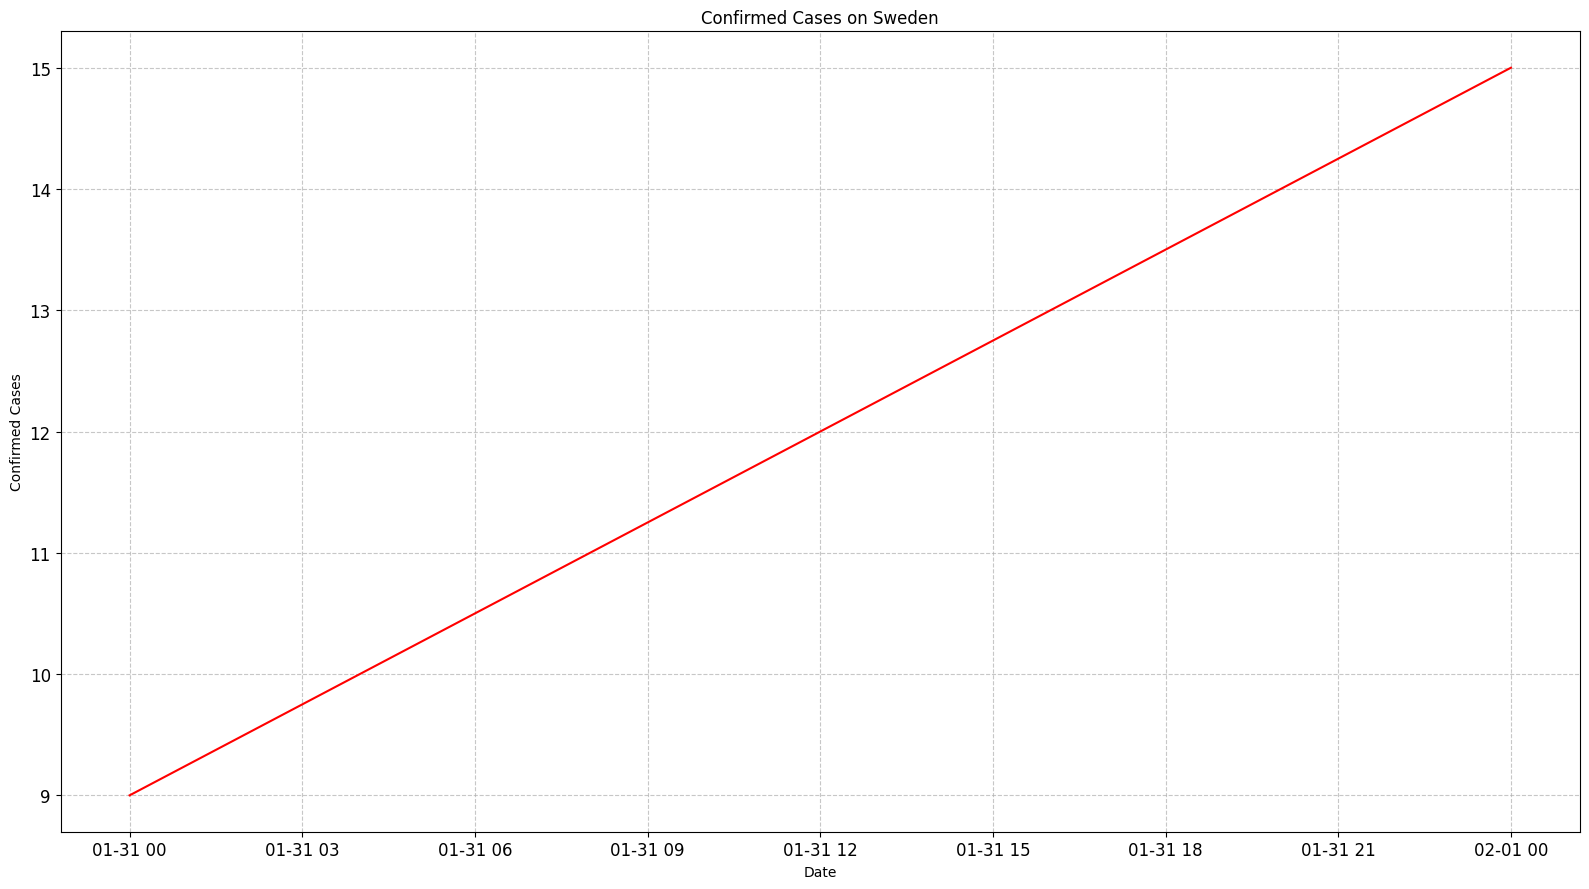

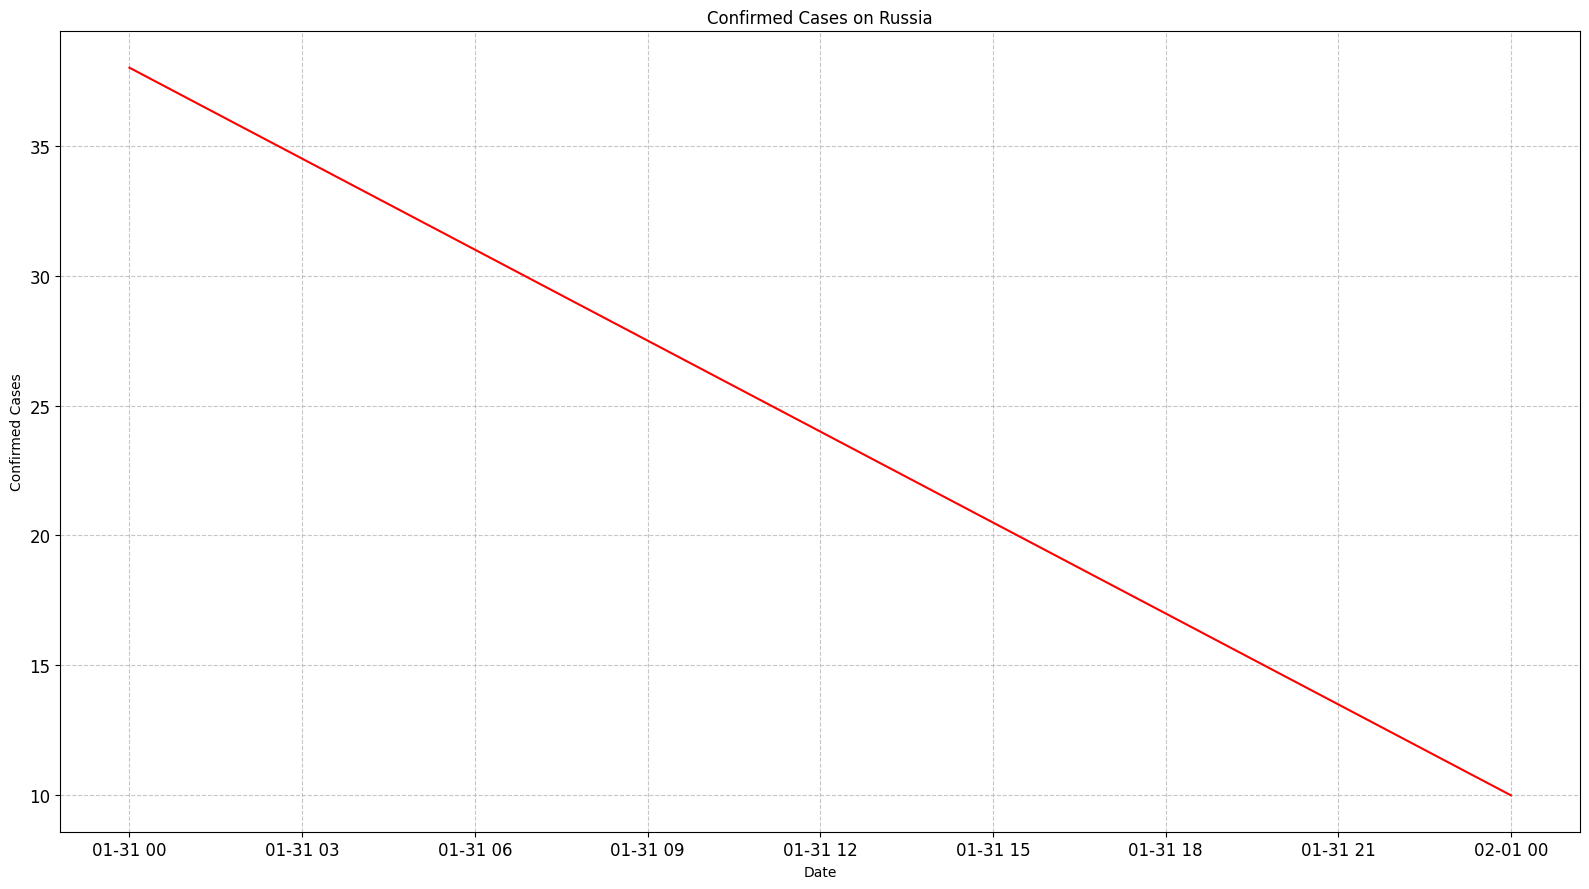

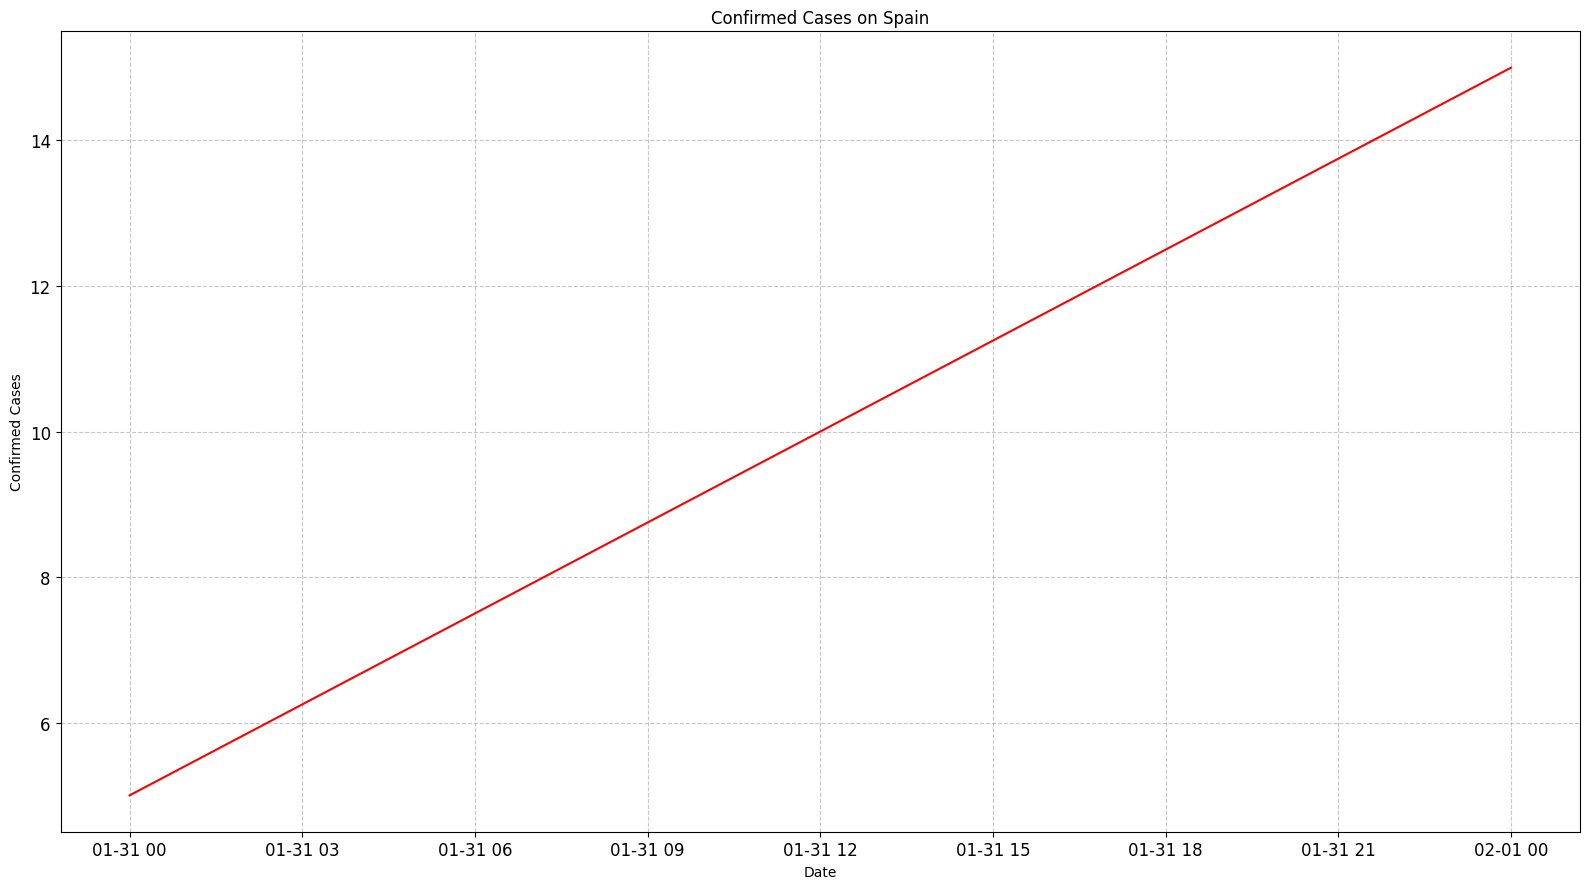

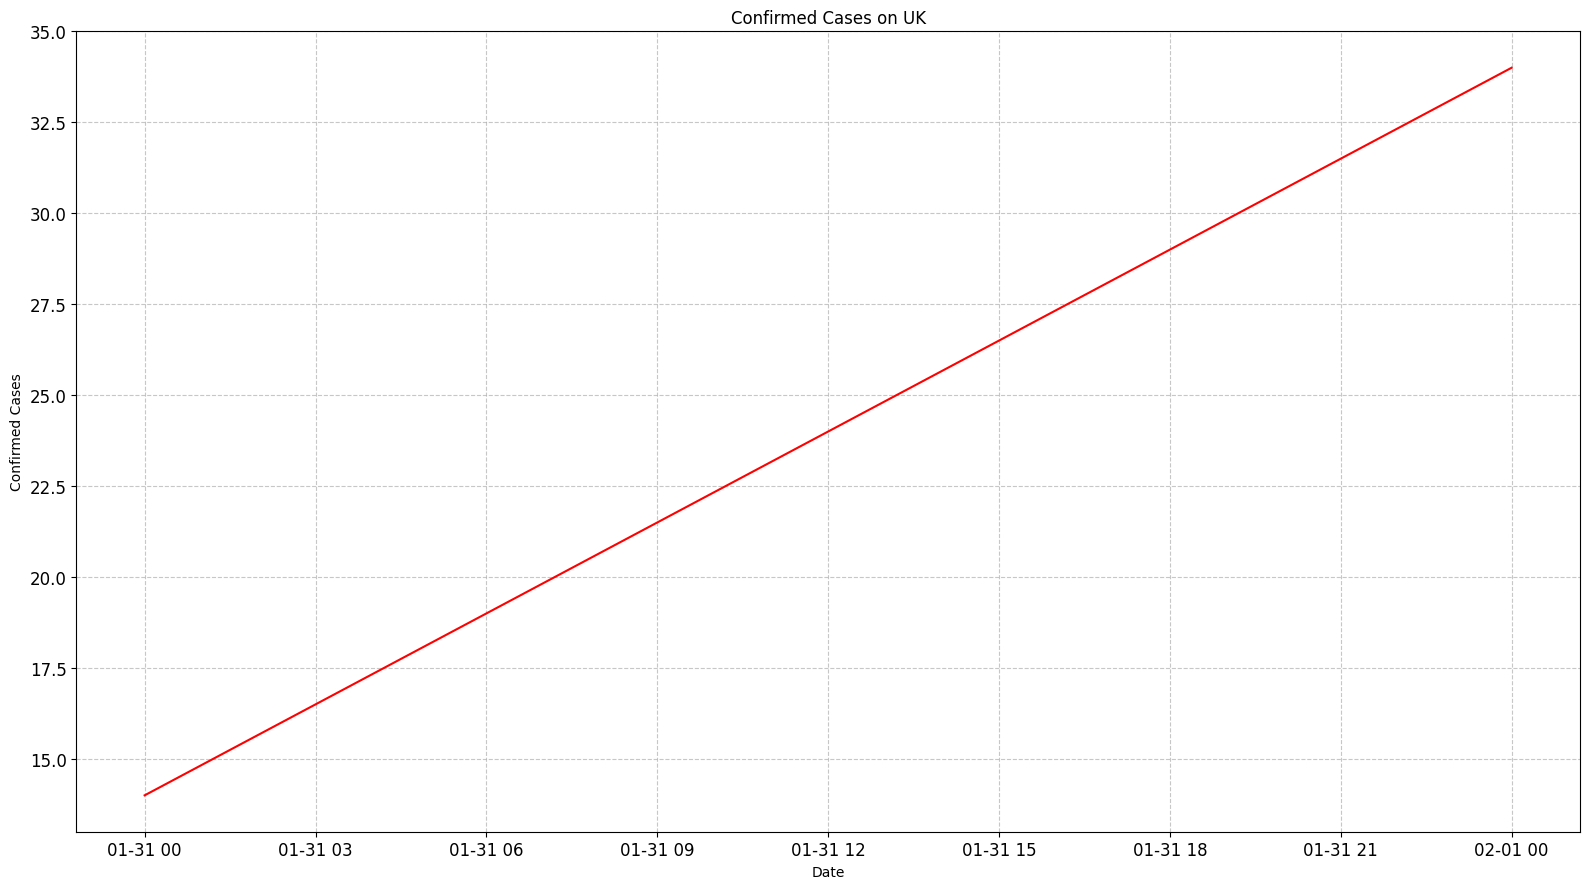

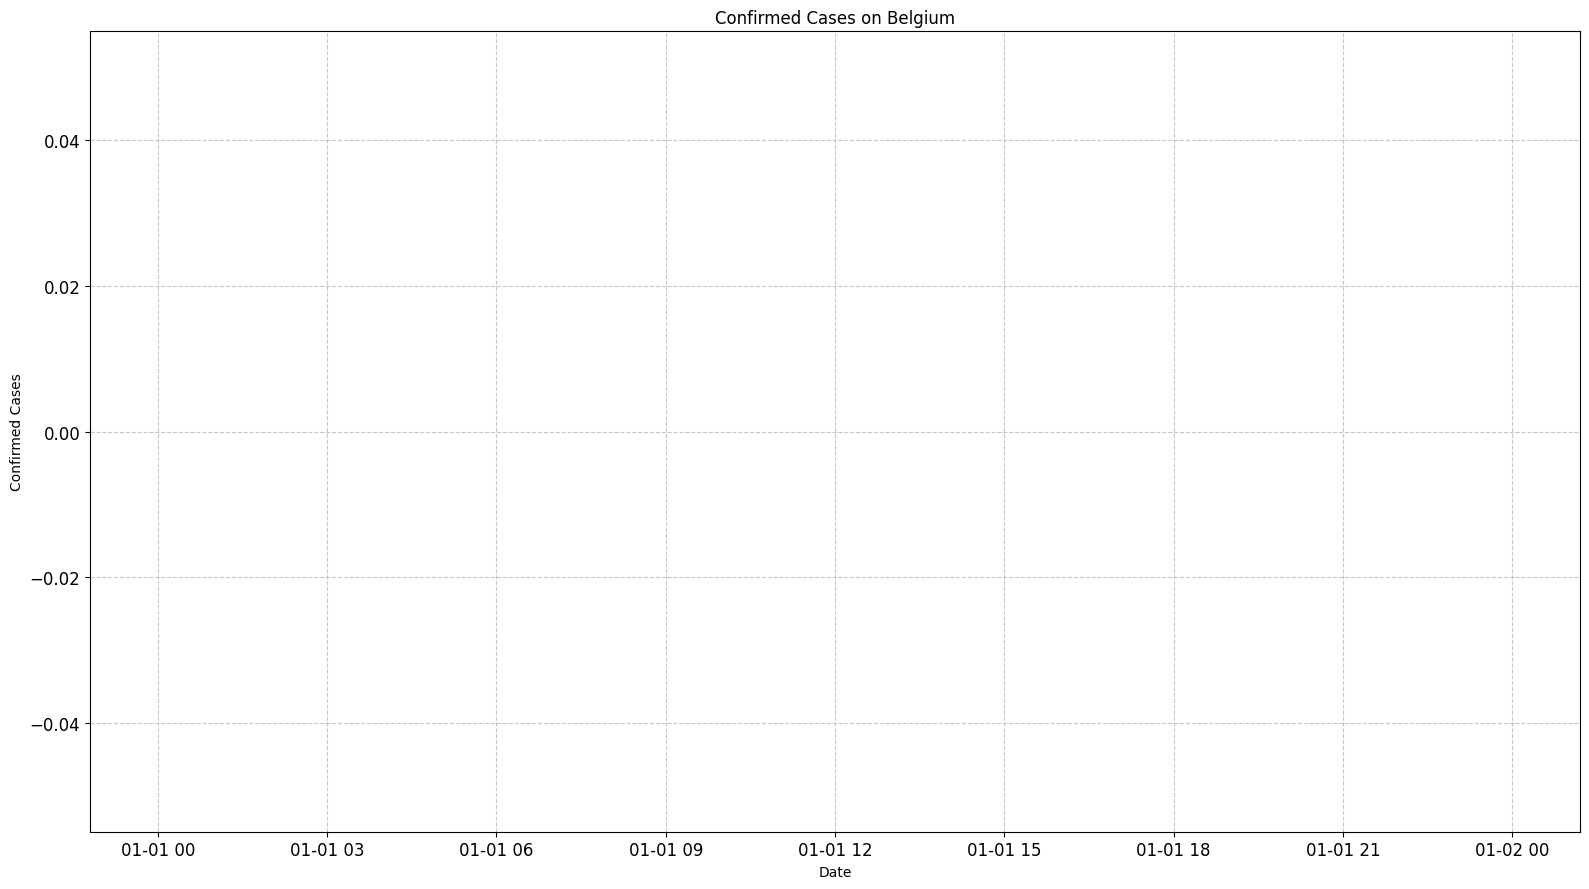

In [165]:
display(countries[1:])

for countrie in countries:
    countrie_df = filterByCountry(df, country= countrie)
    x = countrie_df.loc[china_df['Confirmed'].notna(), 'Last Update']
    y = countrie_df.loc[china_df['Confirmed'].notna(), 'Confirmed']

    # Chamando a função plotTimeSeries com os argumentos necessários, incluindo a cor
    plotTimeSeries(x=x, y=y, title=f'Confirmed Cases on {countrie}', AxisX='Date', AxisY='Confirmed Cases', save=f'./graphs/Confirmed-cases-{countrie}.png')